# **Week 1 notebook**

### **Book exercise 1**

<img src="SymPyBilleder/2025-09-01-10-18-48.png" width="550">

##### **a)**

Since positive semi-definete means all non-egative eigenvalues, when we find $\rho$ that satisfies such.

In [1]:
# We use python for this:
from sympy import *
init_printing()

rho = symbols('rho')
rho_bold = Matrix([[1, rho, rho],[rho,1,rho],[rho,rho,1]])
rho_bold.eigenvals()

First we see that $\rho \leq 1$ and from the other $\rho \geq -0.5$.

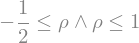

In [2]:
# We now solve for all values of rho that makes eigenvalues non-negative:
solve([value >= 0 for value in rho_bold.eigenvals().keys()], rho)

Thus the values must be between the limits above to ensure semi-definiteness.

##### **b)**

First, since we only have one variable, then in the matrix, the diagonal the variance, and the off-diagonal the covariance. Therefore, we find the contour ellipsoid axes via the eigenvectors of the dispersion matrix.

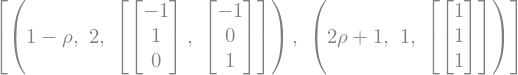

In [3]:
# We use python for this:
from sympy import *
init_printing()

rho = symbols('rho')
rho_bold = Matrix([[1, rho, rho],[rho,1,rho],[rho,rho,1]])
rho_bold.eigenvects()

We get the eigenvalues:
$$
\lambda_1 = 1-\rho
$$
$$
\lambda_2 = 2\rho +1
$$
And:
$$
v_1 = \begin{bmatrix} -1 \\ 1 \\ 0 \end{bmatrix} \: \text{and} \: v_2 = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
$$
These vectors are to be normalized.

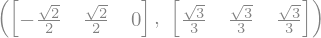

In [6]:
v1 = Matrix([[-1, 1, 0]])
v2 = Matrix([[1, 1, 1]])

v1_norm = v1 / v1.norm()
v2_norm = v2 / v2.norm()

v1_norm, v2_norm

Now we must find the last eigenvector, which is a linear combination of the two above, because for one of the eigenvalues, we have multiplicity of 2, meaning that the space of 3 is not fully spanned. Hence, we must do this extra step.

Recalling our two egienvectors, we know that $v_3$ must satisfy:
$$
-x_1 + x_2 + 0 = 0
$$
$$
x_1 + x_2 + x_3 = 0
$$
We solve this in sympy below.

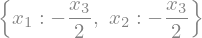

In [8]:
x1, x2, x3 = symbols('x1 x2 x3')

eq1 = Eq(-x1 + x2 + 0, 0)
eq2 = Eq(x1 + x2 + x3, 0)

solve((eq1, eq2), (x1, x2, x3))

Forming a vector out of $x_3$ gives us:
$$
v_3 = x_3 \begin{bmatrix} -\frac{1}{2} \\ -\frac{1}{2} \\ 1 \end{bmatrix}
$$
We scale this with $2$:
$$
v_3 = x_3 \begin{bmatrix} -1 \\ -1 \\ 2 \end{bmatrix}
$$
Now we will normalize in Python.

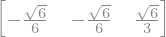

In [9]:
v3 = Matrix([[-1, -1, 2]])

v3_norm = v3 / v3.norm()

v3_norm

The three normalized eigenvectors are thus the axes directions of the ellipsoid, and the eigenvalues are the lengths of the semi-axes:
$$
v_1 = \frac{\sqrt{2}}{2} \begin{bmatrix} -1 \\ 1 \\ 0 \end{bmatrix}, \: v_2 = \frac{\sqrt{3}}{3} \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}, \: v_3 = \frac{\sqrt{6}}{6} \begin{bmatrix} -1 \\ -1 \\ 2 \end{bmatrix}
$$

### **Book exercise 1.2**

<img src="SymPyBilleder/2025-09-01-10-59-40.png" width="550">

##### **a)**

We use the mean addition rule, so:
$$
E[U] = E[X]+E[Y]+E[Z] \Rightarrow E[U] = 1+1+1= 3
$$
$$
E[V] = 2E[X] - E[Y] - E[Z] \Rightarrow E[V] = 2 \cdot 1 - 1 - 1 = 0
$$

##### **b)**

We calculate via some rules:
$$
V[U] = V[X+Y+Z] = V[X] + V[Y] + V[Z] + 2\text{Cov}[X,Y] + 2\text{Cov}[X,Z] + 2\text{Cov}[Y,Z    ]
$$
$$
\Rightarrow V[U] = 1+1+1+2\rho + 2\rho + 2\rho = 3 + 6\rho
$$

##### **c)**

We calculate again via the rules on slides 54:
$$
V[V] = V[2X-Y-Z] = 2^2V[X] + V[Y] + V[Z] + 2\cdot2\cdot(-1)\text{Cov}[X,Y] + 2\cdot2\cdot(-1)\text{Cov}[X,Z] + 2\text{Cov}[Y,Z]
$$
$$
\Rightarrow V[V] = 4 + 1 + 1 - 4\rho - 4\rho + 2\rho = 6 - 6\rho
$$
This is via the rule:
$$
\text{Cov}[aX+bY] = ab\text{Cov}[X,Y]
$$
So for instance:
$$
\text{Cov}[2X,-Y] = 2\cdot(-1)\text{Cov}[X,Y] = -2\text{Cov}[X,Y]
$$

##### **d)**

We use the properties on slides 54:
$$
\text{Cov}[U,V] = \text{Cov}[X+Y+Z, 2X-Y-Z]
$$
$$
= \text{Cov}[X, 2X-Y-Z] + \text{Cov}[Y,2X-Y-Z] + \text{Cov}[Z, 2X-Y-Z]
$$
$$
= 2\text{Cov}[X,X] - \text{Cov}[X,Y] - \text{Cov}[X,Z] + 2\text{Cov}[Y,X] - \text{Cov}[Y,Y] - \text{Cov}[Y,Z] + 2\text{Cov}[Z,X] - \text{Cov}[Z,Y] - \text{Cov}[Z,Z]
$$
$$
=2\rho - \rho - \rho + 2\rho - \rho - \rho + 2\rho - \rho - \rho
$$
$$
=0
$$

##### **e)**

We have to do some partitioning of vector $\begin{bmatrix} X \\ Y \\ Z \end{bmatrix}$, where we then will have $\begin{bmatrix} X \\ Y \end{bmatrix}$ and $\begin{bmatrix} Z \end{bmatrix}$, and hence, we must also partition the disperision matrix accordingly:
$$
\Sigma = \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}
$$
With:
$$
\Sigma_{11} = \begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix}
$$
Since we have a two dimensional vector on the left side of the equation, then our $\Sigma_{11}$ must also be two dimensional, in order to span both $X$ and $Y$.
$$
\Sigma_{12} = \begin{bmatrix} \rho \\ \rho \end{bmatrix}
$$
$$
\Sigma_{21} = \begin{bmatrix} \rho & \rho \end{bmatrix}
$$
$$
\Sigma_{22} = [1]
$$
$$
\mu_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$
$$
\mu_2 = 1
$$
Because we use the formula from slide 71 given as:
$$
E(X_1|X_2=x_2)=\mu_1 +\Sigma_{11}\Sigma_{22}^{-1}(x_2-\mu_2)
$$
Moreover, we have that $\mu_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ and $\mu_2 = [1]$. We put everything in Python.

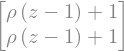

In [ ]:
sigma_12 = Matrix([[rho],[rho]])
sigma_22 = Matrix([1])
mu_1 = Matrix([[1],[1]])
mu_2 = Matrix([1])

z = symbols("z")

x_2 = Matrix([z])

mu_1+sigma_12*sigma_22.inv()*(x_2-mu_2)

This is, therefore, the answer.

### **Book exercise 1.3**

<img src="SymPyBilleder/2025-09-01-13-58-30.png" width="550">

<img src="SymPyBilleder/2025-09-01-13-58-40.png" width="550">

##### **a)**

The variance of $X$ is $1$ as shown in the dispersion matrix, and $Y+aZ$ has variance of:
$$
V[Y+aZ] = V[Y] + a^2V[Z] + 2aCov[Y,Z] = 1 + a^2 + 2a\rho
$$
Next:
$$
\text{Cov}[X,Y+aZ] = \text{Cov}[X,Y] + a\text{Cov}[X,Z] = \rho + a\rho^2
$$

##### **b)**

This will be:
$$
\text{Cov}[X,Y+aZ]^2 = (\rho + a\rho^2)^2 
$$
Now for the correlation:
$$
\text{Corr}[X,Y+aZ]^2 = \frac{\text{Cov}[X,Y+aZ]^2}{V[X]V[Y+aZ]} = \frac{(\rho + a\rho^2)^2}{1(1+a^2 + 2a\rho)} = \frac{(\rho + a\rho^2)^2}{1+a^2 + 2a\rho}
$$

##### **c)**

Nowe we have to determine $a$ so that the expression in b) is maximized. First we start by expanding our expression above:
$$
\frac{(\rho + a\rho^2)^2}{1+a^2 + 2a\rho} = \frac{\rho^2 + 2a\rho^3 + a^2\rho^4}{1+a^2 + 2a\rho}
$$
$$
= \rho^2 \cdot \frac{1 + 2a\rho + a^2\rho^2}{1+a^2 + 2a\rho}
$$
Find the derivative with respect to $a$ and set it to zero in order to find the maximum value.

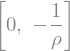

In [18]:
rho, a = symbols('rho a')

expression = rho**2 * S(1 + 2*a*rho + a**2*rho**2)/(1 + a**2 + 2*a*rho)

diff_eq = Eq(diff(expression, a), 0)

solve(diff_eq, a)

Hence, $a=0$ for the maximum value of the correlation thing.

##### **d)**

We insert $a=0$ into our expression from b):
$$
= \frac{(\rho + 0\cdot\rho^2)^2}{1+0^2 + 2\cdot 0 \cdot \rho}
$$
$$
=\frac{\rho^2}{1} = \rho^2
$$

##### **e)**

Now to find the squared multiple correlation between $X$ an $[Y,Z]^T$. We use the formula:
$$
\rho^2_{X|YZ} = 1 - \frac{\text{det}\Sigma_i}{\sigma_{ii}\text{det}\Sigma_{xx}}
$$
This is because:
$$
\Sigma = \begin{bmatrix} 1 & \rho & \rho^2 \\
\rho & 1 & \rho \\
\rho^2 & \rho & 1 \end{bmatrix}
$$
$$
\Sigma_{xx} = \begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix}
$$
$$
\sigma_{ii} = 1
$$
Via the form:
$$
\Sigma = \begin{bmatrix} \sigma_{ii} & \sigma_iT \\ \sigma_i & \Sigma_{xx} \end{bmatrix}
$$
So now we just insert everything into the formula and calculate via Python.

In [21]:
Sigma_i = Matrix([[1, rho, rho**2], [rho, 1, rho], [rho**2, rho, 1]])
Sigma_xx = Matrix([[1, rho], [rho, 1]])
sigma_ii = 1

(1-S((Sigma_i).det())/(sigma_ii*(Sigma_xx).det())).simplify()

This is therefore the answer.

##### **f)**

Formula on page 34 in the book:
$$
\rho_{ij|k} = \frac{\rho_{ij} - \rho_{ik}\rho_{jk}}{\sqrt{(1-\rho_{ik}^2)(1-\rho_{jk}^2)}}
$$
Inserting everything gives:
$$
\rho_{XZ|Y} = \frac{\rho^2 - \rho \cdot \rho}{\sqrt{(1-\rho^2)(1-\rho^2)}} = \frac{0}{1-\rho^2} = 0
$$
Then:
$$
\rho_{XY|Z} = \frac{\rho-\rho^2 \rho}{\sqrt{(1-\rho^4)(1-\rho^2)}} = \frac{\rho(1-\rho^2)}{\sqrt{(1-\rho^4)(1-\rho^2)}} = \frac{\rho}{\sqrt{1+\rho^2}}
$$

##### **g)**

Yes, one of the partial correlations is zero, which is also the value of $a$ that maximized the squared correlation expression in c).

From this we see that $\rho_{XZ|Y} = 0$, which means that $X$ and $Z$ are conditionally independent given $Y$, and that means if we want to estimate correlations based on $X$ given $Y$ and $Z$, then we should just use $Y$ and not $Z$ since it does not add any value.

### **Extra exercise**

<img src="SymPyBilleder/2025-09-01-14-38-45.png" width="550">

##### **Answer:**

...

# **Slide A in R code**

In [ ]:
# # Slide 15:
# Challenger <- data.frame(flt = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23),
#                         temp = c(66,70,69,68,67,72,73,70,57,63,70,78,67,53,67,75,70,81,76,79,75,76,58),
#                           td = c(0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1))
# Challenger <- Challenger[order(Challenger$td),]; row.names(Challenger)<-1:23

# OR, more compact: 

Challenger<-read.csv2("../data/Challenger.csv")
Challenger <- Challenger[order(Challenger$td),]; row.names(Challenger)<-1:23
head(Challenger)

# t.test(Challenger$temp[Challenger$td == 0], Challenger$temp[Challenger$td == 1])
# t.test(Challenger$temp[Challenger$td == 0], Challenger$temp[Challenger$td == 1], var.eq = TRUE)

# OR, more compact: 
# (formula form does not support var.equal=T);

with(Challenger, t.test(temp~td))
with(Challenger, t.test(temp[td==0],temp[td==1],var.eq=T))

# just the p-value:
with(Challenger, t.test(temp~td))$p.value
with(Challenger, t.test(temp[td==0],temp[td==1],var.eq=T))$p.value

# T-test because we have two sets of data - two means and two variances, hence, we are comparing 4 parameters

# # alternative, using the bracket operator [:
# t.test(Challenger$temp[Challenger$td == 0], Challenger$temp[Challenger$td == 1])
# t.test(Challenger$temp[Challenger$td == 0], Challenger$temp[Challenger$td == 1], 
# var.eq = TRUE)

,flt,temp,td
,<int>,<int>,<int>
1,1,66,0
2,3,69,0
3,4,68,0
4,5,67,0
5,6,72,0
6,7,73,0



	Welch Two Sample t-test

data:  temp by td
t = 2.5387, df = 7.9166, p-value = 0.03507
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
  0.7569431 16.0644855
sample estimates:
mean in group 0 mean in group 1 
       72.12500        63.71429 



	Two Sample t-test

data:  temp[td == 0] and temp[td == 1]
t = 3.1032, df = 21, p-value = 0.005383
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.774344 14.047085
sample estimates:
mean of x mean of y 
 72.12500  63.71429 


[1] 0.03506834

[1] 0.005382629

In [ ]:
# Slide 16:

# Challenger
# This is just to show the data

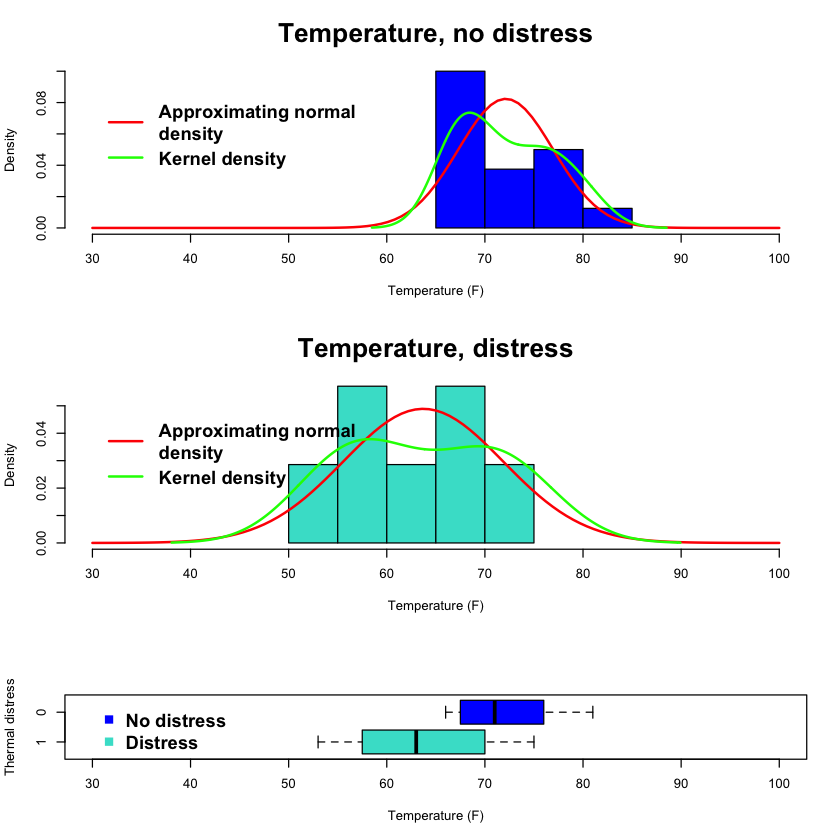

In [ ]:
# Slide 17:
# Histograms:

layout.matrix<-matrix(c(1,1,1,2,2,2,3,3),ncol=1)
layout(layout.matrix)
# Plot 1
with(Challenger,
       hist(temp[td==0],xlim=c(30,100),probability=T,xlab='Temperature (F)',
       main ="Temperature, no distress",col="blue",cex.main=2))
with(Challenger,
       curve(dnorm(x,mean=mean(temp[td==0]),sd=sd(temp[td==0])),30,100,
             col="red",lwd=2,add=T))
with(Challenger,
       lines(density(temp[td==0])$x,density(temp[td==0])$y,type="l",
             lwd=2,col="green"))
legend(30,0.09,c("Approximating normal\ndensity","Kernel density"),lty=1,
       col=c("red","green"),bty="n",cex=1.4,text.font=2,lwd=2)
# Plot 2
with(Challenger,
       hist(temp[td==1],xlim=c(30,100),probability=T,xlab='Temperature (F)',
       main ="Temperature, distress",col="turquoise",cex.main=2))
with(Challenger,
       curve(dnorm(x,mean=mean(temp[td==1]),sd=sd(temp[td==1])),30,100,
             col="red",lwd=2,add=T))
with(Challenger,
       lines(density(temp[td==1])$x,density(temp[td==1])$y,type="l",
             lwd=2,col="green"))
legend(30,0.05,c("Approximating normal\ndensity","Kernel density"),lty=1,
       col=c("red","green"),bty="n",cex=1.4,text.font=2,lwd=2)
# Plot 3
with(Challenger, boxplot(temp~1-td,horizontal=T,at=c(1,0),col=c("blue","turquoise"),
     xlab="Temperature (F)",ylab="Thermal distress",ylim=c(30,100)))
legend(30,1.5,c("No distress","Distress"),col=c("blue","turquoise"),bty="n",
       pch=15,cex=1.4,text.font=2)
# T-test is sensitive to outliers, as outliers can multiply the variance and affect the test results
# Below is just how data looks when there are few points

In [ ]:
# Slide 19:
# When distribution increases -> infinity,
# then the T-test becomes more close to the normal distribution and more robust to violations of assumptions like outliers

# means and summaries:

with(Challenger,by(temp,td,summary))

# t-test:

my.t.test<-data.frame(td=0:1)
my.t.test$n<-with(Challenger,tapply(temp,td,length))
my.t.test$mean<-with(Challenger,tapply(temp,td,mean))
my.t.test$sem<-with(Challenger,tapply(temp,td,sd))/
               sqrt(my.t.test$n)
my.t.test$lower<-my.t.test$mean-qt(0.95,df=my.t.test$n-1)*my.t.test$sem
my.t.test$upper<-my.t.test$mean+qt(0.95,df=my.t.test$n-1)*my.t.test$sem
my.t.test$t.equal.var<-c(NA,with(Challenger, 
                         t.test(temp[td==0],temp[td==1],var.eq=T))$stat)
my.t.test$t<-c(NA,with(Challenger, 
               t.test(temp[td==0],temp[td==1]))$stat)
my.t.test$p.equal.var<-c(NA,with(Challenger, 
                         t.test(temp[td==0],temp[td==1],var.eq=T))$p.value)
my.t.test$p<-c(NA, with(Challenger, 
               t.test(temp[td==0],temp[td==1]))$p.value)

my.t.test[,3:8]<-round(my.t.test[,3:8],digits=2)
my.t.test[,9]<-format.pval(my.t.test[,9],eps=0.0001,digits=1)
my.t.test[,10]<-format.pval(my.t.test[,10],eps=0.0001,digits=1)
my.t.test

# How does the variance look?

with(Challenger, tapply(temp,td,var))

library(car)
leveneTest(temp~as.factor(td),data=Challenger)

# borderlining significance; doubtful if support for equal variances. 

td: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  66.00   67.75   71.00   72.12   76.00   81.00 
------------------------------------------------------------ 
td: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  53.00   57.50   63.00   63.71   70.00   75.00 

td,n,mean,sem,lower,upper,t.equal.var,t,p.equal.var,p
<int>,<int[1d]>,<dbl[1d]>,<dbl[1d]>,<dbl[1d]>,<dbl[1d]>,<dbl>,<dbl>,<chr>,<chr>
0,16,72.12,1.21,70.00,74.25,NA,NA,NA,NA
1,7,63.71,3.08,57.72,69.71,3.1,2.54,0.005,0.04


0        1 
23.45000 66.57143

Warning message:
"pakke 'car' blev bygget under R version 4.3.3"
Indlaeser kraevet pakke: carData



,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,3.662801,0.06936794
,21,NA,NA


[1] 0.005423021

[1] 0.03505687

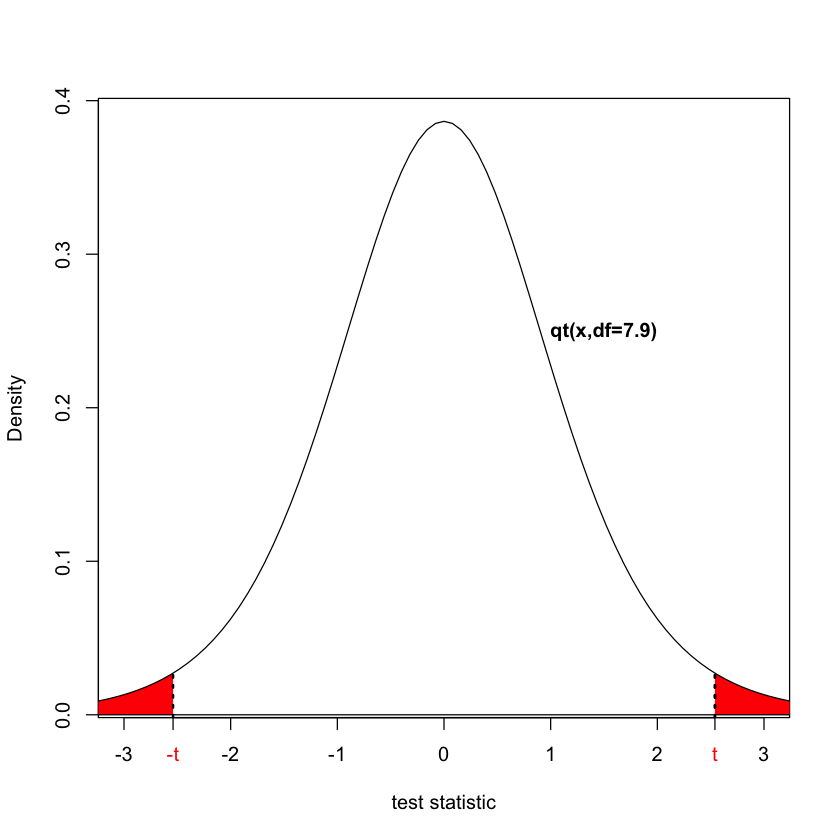

In [ ]:
# Slide 20:

2*pt(-3.10,df=21); 2*pt(-2.54,df=7.9)

curve(dt(x,df=7.9),-3,3,lty=0,ylab='Density',xlab='test statistic',xaxt="n")
axis(1)
polygon(c(-4,-4,-4+(1:100/100)*(4-2.54),-2.54),
        c(0,dt(-4+(0:100/100)*(4-2.54),df=7.9),0),col="red",lty=0)
polygon(c(4,4,4+(1:100/100)*(-4+2.54),2.54),
        c(0,dt(4+(0:100/100)*(-4+2.54),df=7.9),0),col="red",lty=0)
curve(dt(x,df=7.9),-4,4,add=T)
lines(c(-4,4),rep(0,2),type="l")
lines(rep(-2.54,2),c(par("usr")[3],dt(-2.54,df=7.9)),lty=3,lwd=2)
lines(rep(2.54,2),c(par("usr")[3],dt(2.54,df=7.9)),lty=3,lwd=2)
lines(rep(2.54,2),c(par("usr")[3],dt(2.54,df=7.9)),lty=3,lwd=2)
axis(1,labels=c("-t","t"),at=c(-2.54,2.54),cex=0.3,col.axis="red")
text(1.5,0.25,"qt(x,df=7.9)",font=2)

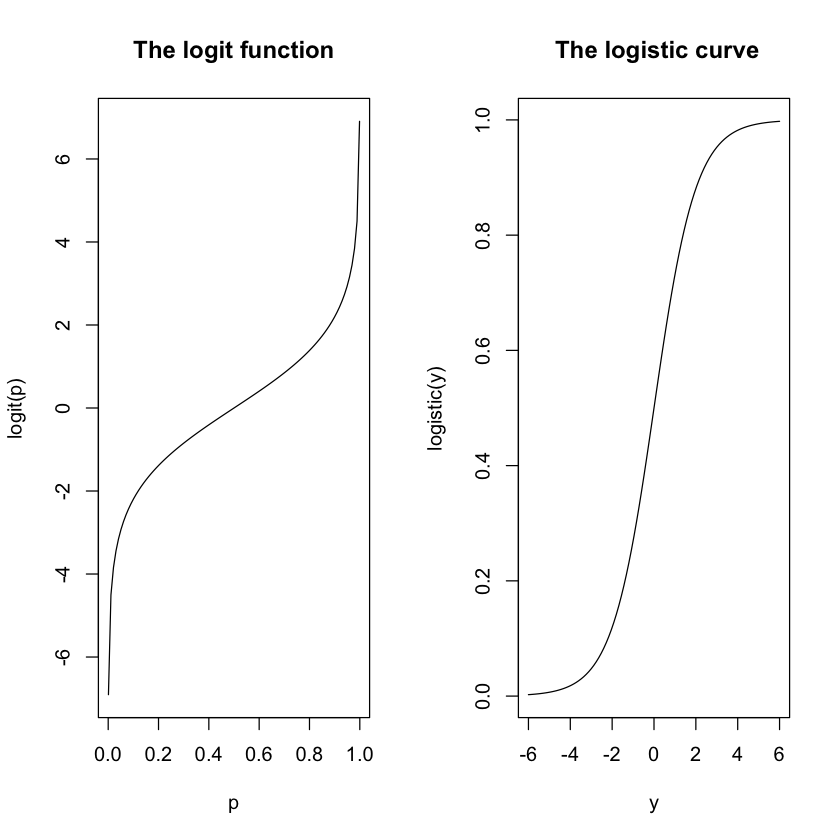

In [ ]:
# Slide 23:

logit<-function(p){log(p/(1-p))}
logistic<-function(y){exp(y)/(1+exp(y))}

par(mfrow=c(1,2))
curve(logit,0.001,0.999,xlab='p',ylab='logit(p)', main="The logit function")
curve(logistic,-6,6,xlab='y',ylab='logistic(y)',main=" The logistic curve")
par(mfrow=c(1,1))

In [ ]:
# Slide 24:

model <- glm(td ~ temp, family=binomial(link='logit'), data=Challenger)
summary(model)
drop1(model,test="Chisq")


Call:
glm(formula = td ~ temp, family = binomial(link = "logit"), data = Challenger)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  15.0429     7.3786   2.039   0.0415 *
temp         -0.2322     0.1082  -2.145   0.0320 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 28.267  on 22  degrees of freedom
Residual deviance: 20.315  on 21  degrees of freedom
AIC: 24.315

Number of Fisher Scoring iterations: 5


,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,20.31519,24.31519,NA,NA
temp,1,28.26715,30.26715,7.95196,0.004803533


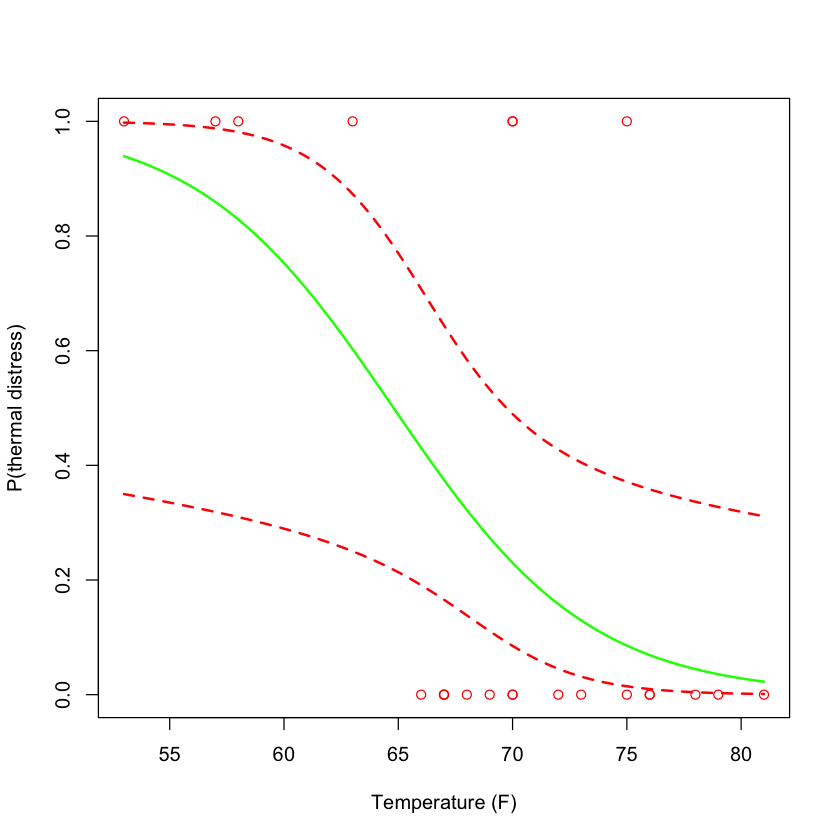

In [ ]:
# Slide 25:
newdat <- data.frame(temp=seq(min(Challenger$temp), 
                              max(Challenger$temp),length=100))
newdat$fit = predict(model, newdata=newdat)
newdat$se<-predict(model, newdata=newdat,se.fit=T)$se.fit
plot(td ~ temp, data=Challenger, col="red",xlab="Temperature (F)",
     ylab="P(thermal distress)")
lines(logistic(fit)~ temp, data=newdat, col="green", lwd=2)
lines(logistic(fit+1.96*se)~ temp, data=newdat, col="red", lty=2,lwd=2)
lines(logistic(fit-1.96*se)~ temp, data=newdat, col="red", lty=2,lwd=2)

[1] 0.9997541

[1] 4.498164

[1] 0.6413724

[1] 5.62592

[1] 0.9968475

[1] 3.70247

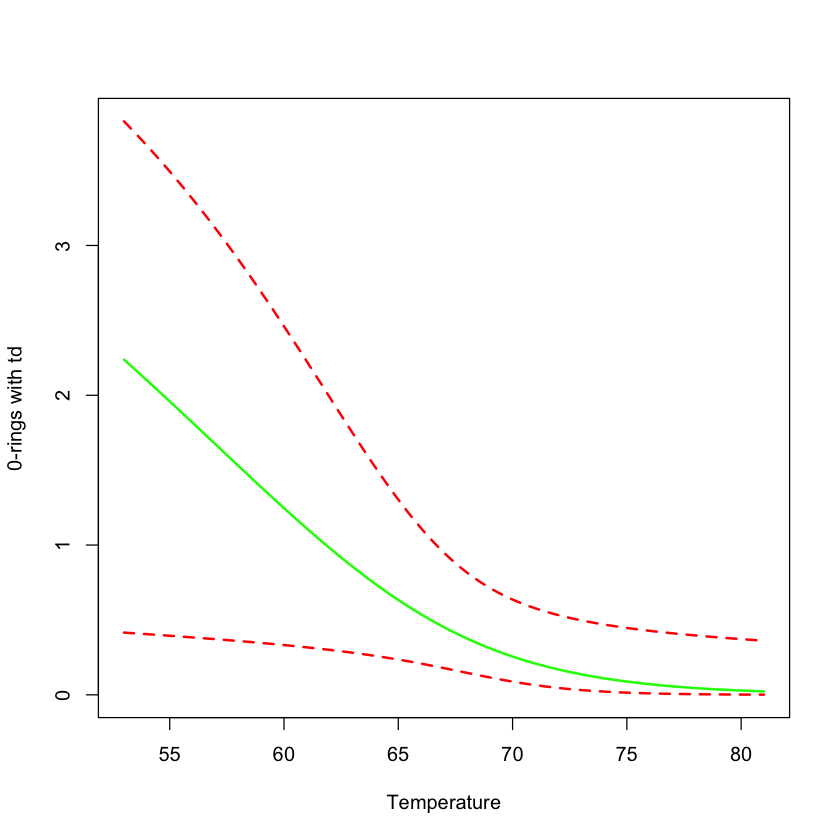

In [ ]:
# Slide 26:
# number of 0-rings with Thermal distress:

p.temp<-logistic(newdat$fit)
p.temp.lower<-logistic(newdat$fit-1.96*newdat$se)
p.temp.upper<-logistic(newdat$fit+1.96*newdat$se)
p.star<-1-(1-p.temp)^(1/6)
p.star.lower<-1-(1-p.temp.lower)^(1/6)
p.star.upper<-1-(1-p.temp.upper)^(1/6)

plot(rep(newdat$temp,2),6*c(p.star.lower,p.star.upper), pch="",
     xlab="Temperature",ylab="0-rings with td")
lines(6*p.star~ temp, data=newdat, col="green", lwd=2)
lines(6*p.star.lower~ temp, data=newdat, col="red",lty=2, lwd=2)
lines(6*p.star.upper~ temp, data=newdat, col="red",lty=2, lwd=2)

# prediction at 29F:

newdat <- data.frame(temp=29)
newdat$fit = predict(model, newdata=newdat)
newdat$se<-predict(model, newdata=newdat,se.fit=T)$se.fit
logistic(newdat$fit)
# [1] 0.9997541

p.temp<-logistic(newdat$fit)
6*(1-(1-p.temp)^(1/6))
# [1] 4.498164

# Uncertainty; not on slide
p.temp.lower<-logistic(newdat$fit-1.96*newdat$se)
p.temp.upper<-logistic(newdat$fit+1.96*newdat$se)
p.star<-1-(1-p.temp)^(1/6)
# lower limit:
6*(1-(1-p.temp.lower)^(1/6))
# upper limit:
6*(1-(1-p.temp.upper)^(1/6))

# large uncertainty

# Prediction at Redline (40 degrees) for engineers (not on slides):

# Prediction at redline (40F):
newdat <- data.frame(temp=40)
newdat$fit = predict(model, newdata=newdat)
newdat$se<-predict(model, newdata=newdat,se.fit=T)$se.fit
logistic(newdat$fit)
 
p.temp<-logistic(newdat$fit)
6*(1-(1-p.temp)^(1/6))

# still rather high

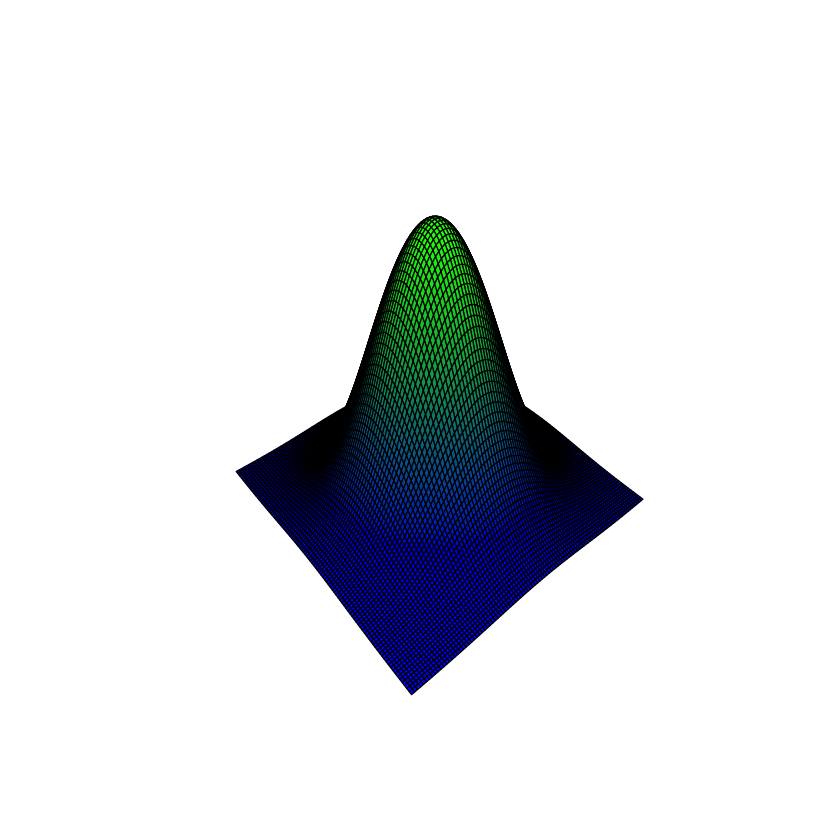

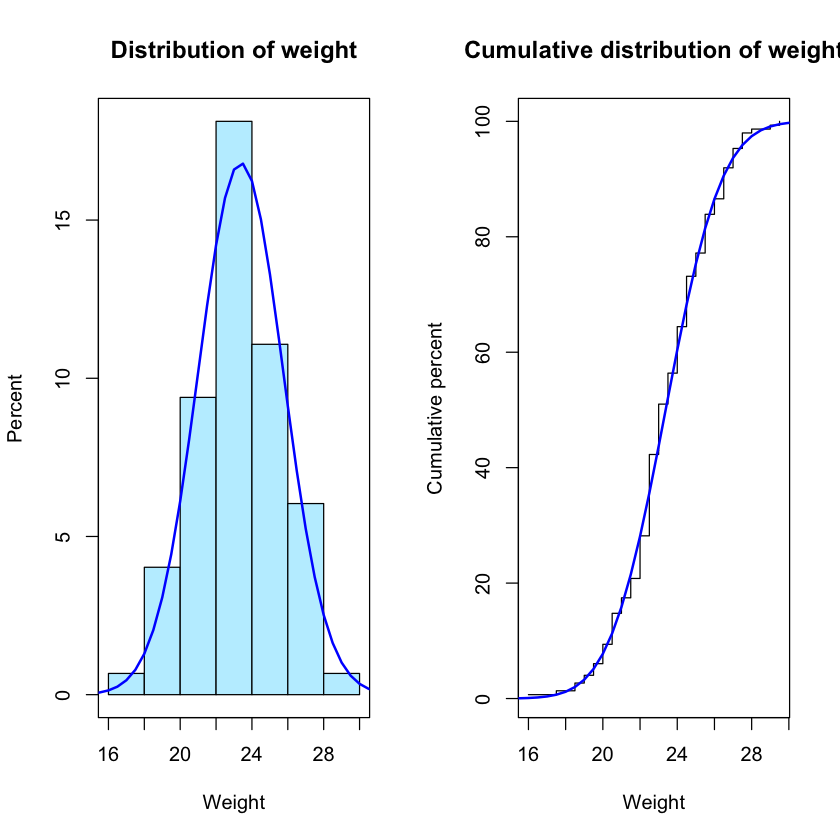

In [ ]:
# Slide 28:

# example of a 3D R graph:

x <- seq(-6.5, 6.5, length.out = 100)
y <- seq(-6.5, 6.5, length.out = 100)
z <- outer(x, y, function(a, b) exp(-((a^2+b^2)/2)/(2*pi)))

# some fun to create nice colors:
nrz <- nrow(z)
ncz <- ncol(z)
# Create a function interpolating colors in the range of specified colors
jet.colors <- colorRampPalette( c("blue", "green") )
# Generate the desired number of colors from this palette
nbcol <- 100
color <- jet.colors(nbcol)
# Compute the z-value at the facet centres
zfacet <- z[-1, -1] + z[-1, -ncz] + z[-nrz, -1] + z[-nrz, -ncz]
# Recode facet z-values into color indices
facetcol <- cut(zfacet, nbcol)

# Actual plot:
persp(x, y, z, col = color[facetcol], phi = 40, theta = 50,box=F)


# Slide 29:
organ<-read.csv2("../data/organ.csv")

par(mfrow=c(1,2))
hist(organ$weight,xlab="Weight",ylab="Percent",probability=T,
     main="Distribution of weight",col="lightblue1",axes=F)
axis(1)
axis(2,labels=c(0,5,10,15),at=c(0,5,10,15)/100)
box()
curve(dnorm(x,mean=mean(organ$weight),sd=sd(organ$weight)),5,55,
      col="blue", lwd=2,add=T)
plot(sort(organ$weight),1:length(organ$weight)/length(organ$weight),
     type="s",xlab="Weight",ylab="Cumulative percent",axes=F,
     main="Cumulative distribution of weight")
axis(1)
axis(2,labels=c(0,20,40,60,80,100),at=c(0,20,40,60,80,100)/100)
box()
curve(pnorm(x,mean=mean(organ$weight),sd=sd(organ$weight)),5,55,
      col="blue", lwd=2,add=T)
par(mfrow=c(1,1))

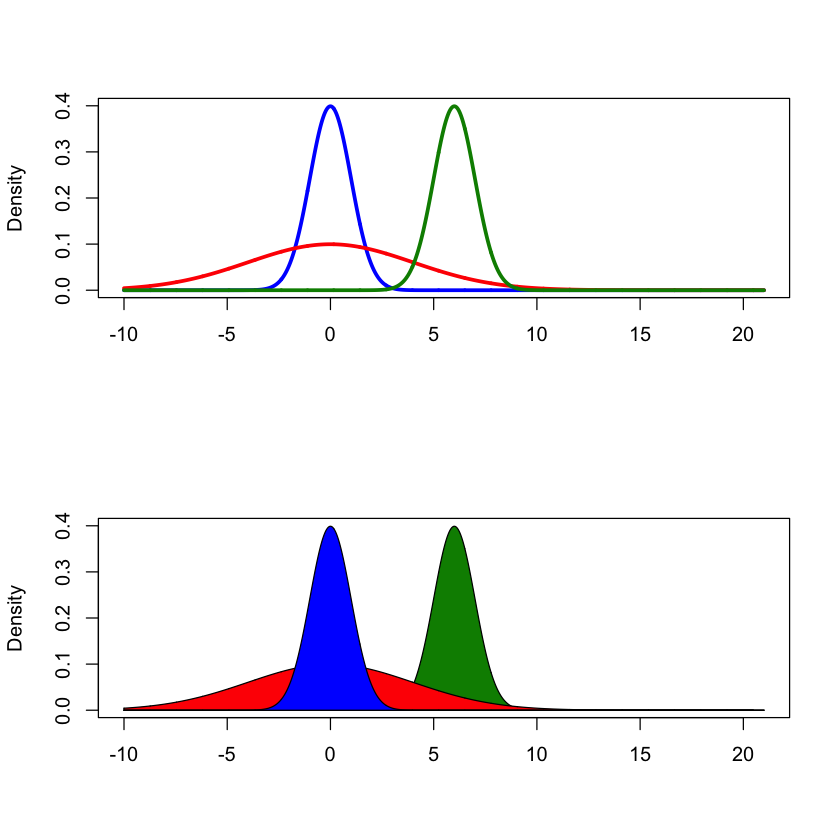

In [ ]:
# Slide 31:

par(mfrow=c(2,1))

plot(0:31-10,c(0,rep(0.4,31)),pch='',xlab=' ',ylab='Density')
lines(0:3100/100-10,dnorm(0:3100/100-10,mean=0,sd=1),col="blue",lwd=3)
lines(0:3100/100-10,dnorm(0:3100/100-10,mean=0,sd=4),col="red",lwd=3)
lines(0:3100/100-10,dnorm(0:3100/100-10,mean=6,sd=1),col="green4",lwd=3)


plot(0:31-10,c(0,rep(0.4,31)),pch='',xlab=' ',ylab='Density')
polygon(c(0:3100/100-10,-10),c(dnorm(0:3100/100-10,mean=6,sd=1),0),col="green4")
polygon(c(0:3100/100-10,-10),c(dnorm(0:3100/100-10,mean=0,sd=4),0),col="red")
polygon(c(0:3100/100-10,-10),c(dnorm(0:3100/100-10,mean=0,sd=1),0),col="blue")

par(mfrow=c(1,1))

In [ ]:
# Slide 32:

head(organ,n=20)

,weight,organ
,<dbl>,<dbl>
1,16.0,1.6
2,17.5,0.7
3,18.5,1.0
4,18.5,1.4
5,19.0,1.7
6,19.0,1.8
7,19.5,1.2
8,19.5,1.3
9,19.5,1.5


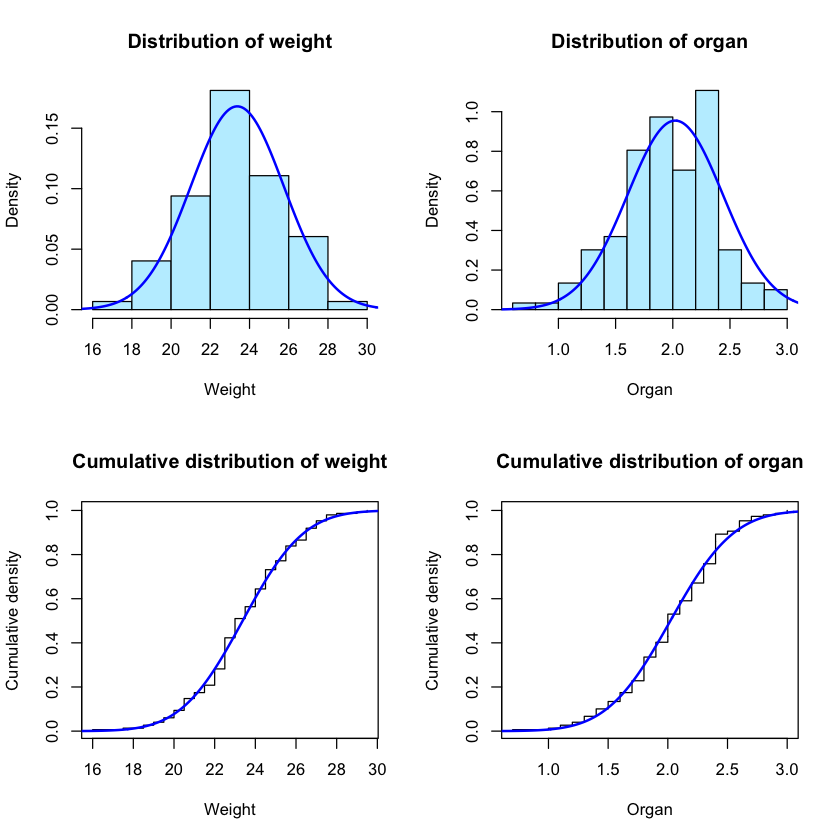

In [ ]:
# Slide 33:

par(mfrow=c(2,2))

hist(organ$weight,xlab="Weight",ylab="Density",probability=T,
     main="Distribution of weight",col="lightblue1")
curve(dnorm(x,mean=mean(organ$weight),sd=sd(organ$weight)),5,55,
      col="blue", lwd=2,n=500,add=T)

hist(organ$organ,xlab="Organ",ylab="Density",probability=T,
     main="Distribution of organ",col="lightblue1")
curve(dnorm(x,mean=mean(organ$organ),sd=sd(organ$organ)),0,4,
      col="blue", lwd=2,n=500,add=T)

plot(sort(organ$weight),1:length(organ$weight)/length(organ$weight),
     type="s",xlab="Weight",ylab="Cumulative density",
     main="Cumulative distribution of weight")
curve(pnorm(x,mean=mean(organ$weight),sd=sd(organ$weight)),5,55,
      col="blue",n=500,lwd=2,add=T)

plot(sort(organ$organ),1:length(organ$organ)/length(organ$organ),
     type="s",xlab="Organ",ylab="Cumulative density",
     main="Cumulative distribution of organ")
curve(pnorm(x,mean=mean(organ$organ),sd=sd(organ$organ)),0,4,
      col="blue",n=500,lwd=2,add=T)

par(mfrow=c(1,1))

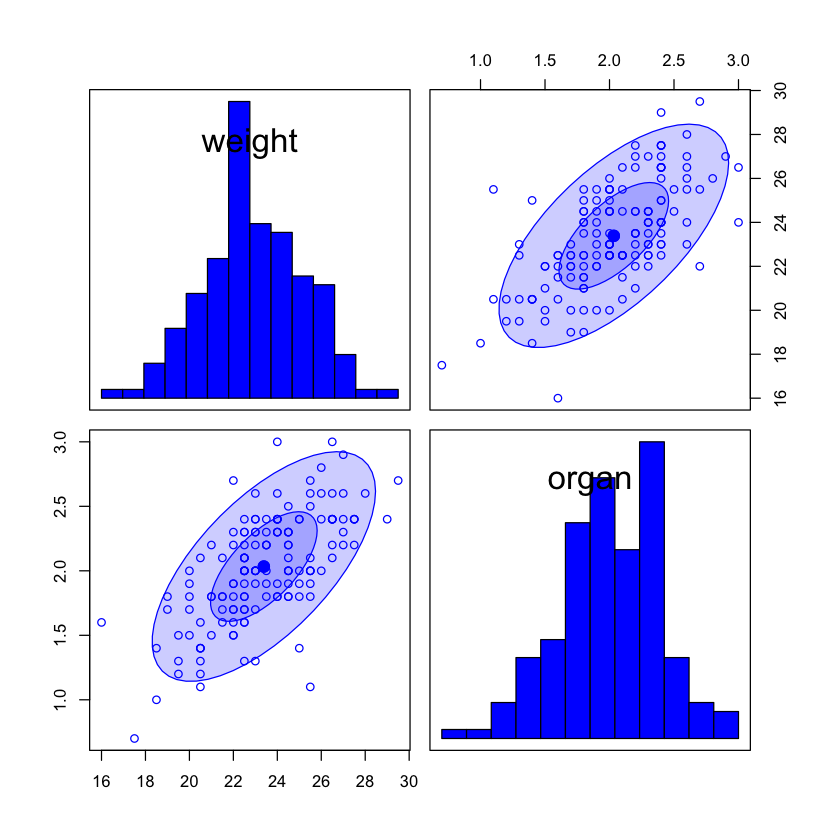

In [ ]:
# Slide 34:
library(car)
scatterplotMatrix(organ,diagonal=list(method ="histogram"),ellipse=T,
                  regLine=F,smooth=F)

Warning message:
"pakke 'mvtnorm' blev bygget under R version 4.3.3"


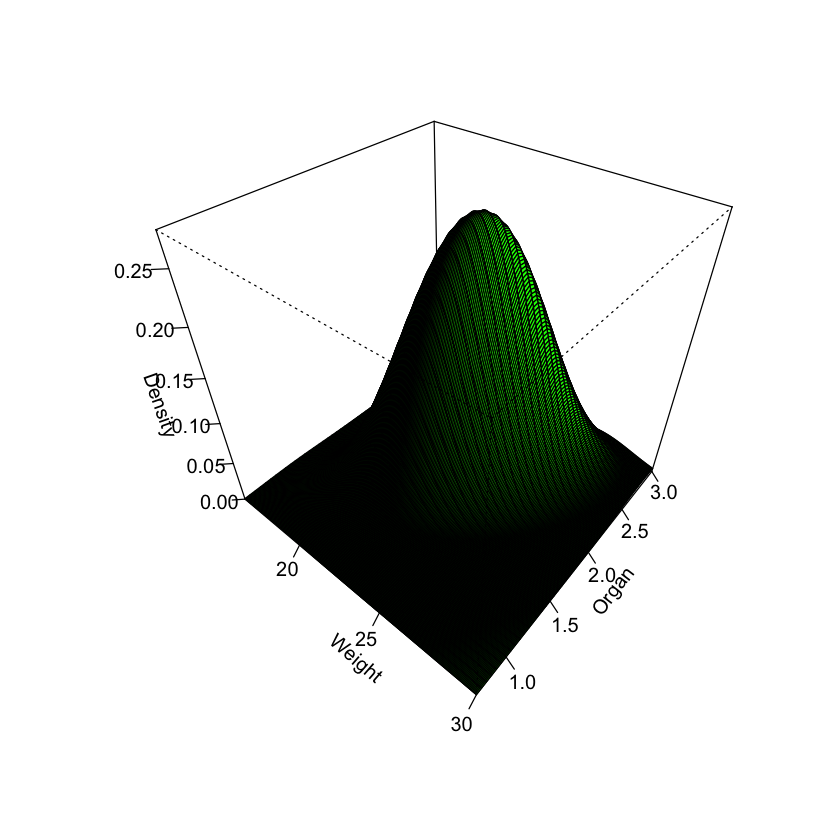

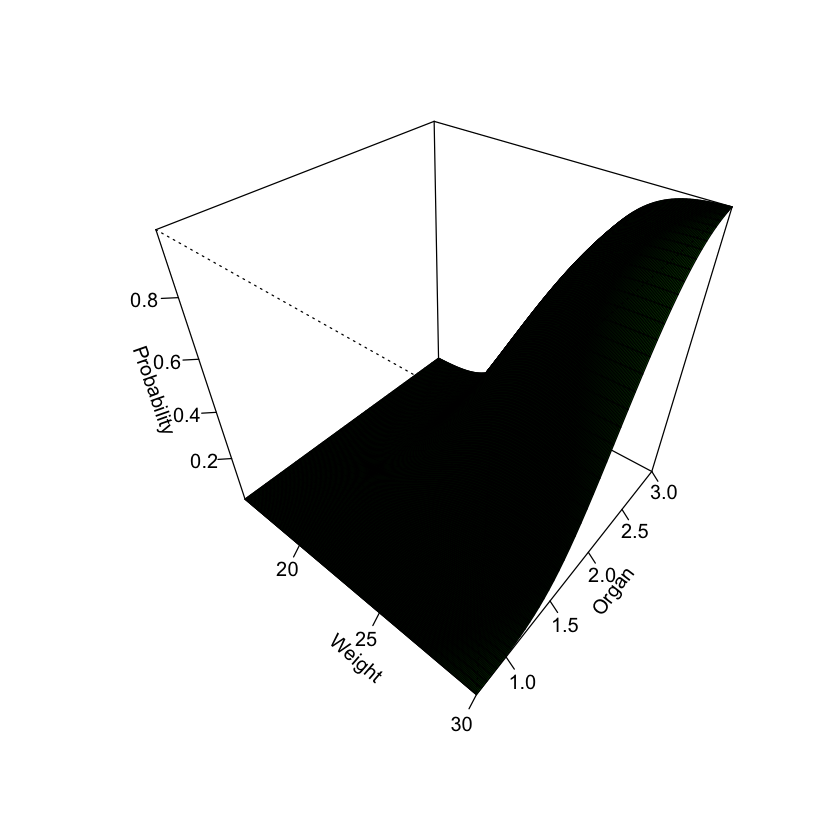

In [ ]:
#Slide 35:

mu.x<-mean(organ$weight)
mu.y<-mean(organ$organ)
Sigma<-cov(organ)
Sigmainv<-solve(Sigma)

x<-(20*16):(20*30)/20
y<-(2*7):(20*3)/20
z<-matrix(nrow=length(x),ncol=length(y))
for(i in 1:length(x)){
  for(j in 1:length(y)){
    z[i,j]<-(1/(2*pi*det(Sigma)))*
            exp(-(t(c(x[i]-mu.x,y[j]-mu.y))%*%Sigmainv%*%(c(x[i]-mu.x,y[j]-mu.y))/2))
    }
  }

persp(x,y,z,theta=40,phi=40,xlab="Weight",ylab="Organ",zlab="Density",col="green",
      ticktype="detailed")

# now with the multivariate distribution evaluated directly:

library(mvtnorm)
x<-(20*16):(20*30)/20
y<-(2*7):(20*3)/20
z<-matrix(nrow=length(x),ncol=length(y))
for(i in 1:length(x)){
  for(j in 1:length(y)){
    z[i,j]<-pmvnorm(lower=c(-Inf,-Inf),upper=c(x[i],y[j]),mean=c(mu.x,mu.y),sigma=Sigma)[1]
    }
  }

persp(x,y,z,theta=40,phi=40,xlab="Weight",ylab="Organ",zlab="Probability",col="green",
      ticktype="detailed")

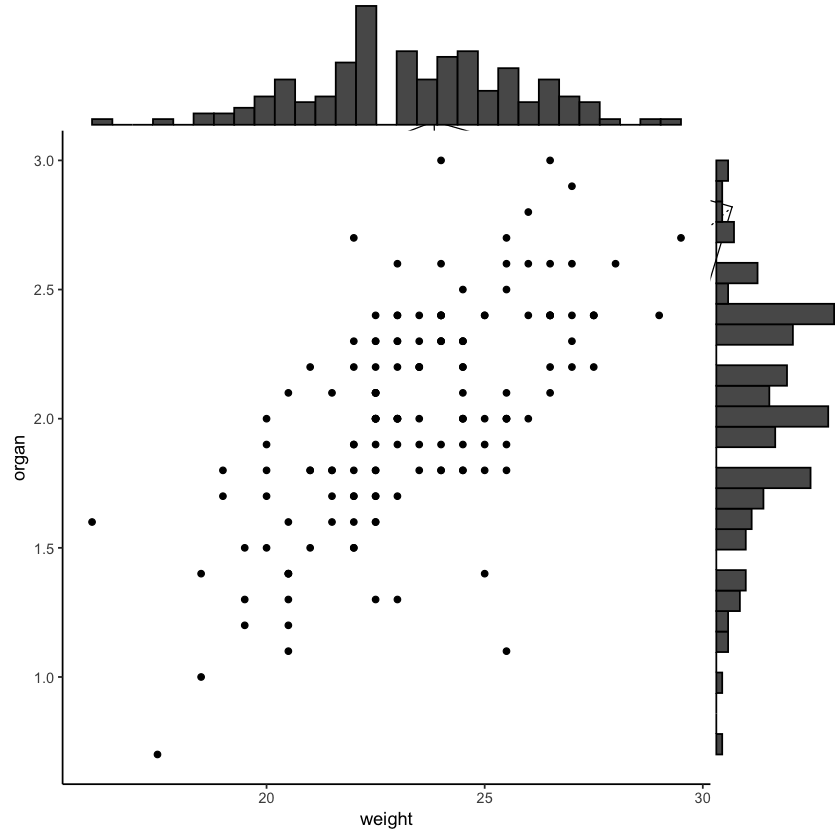

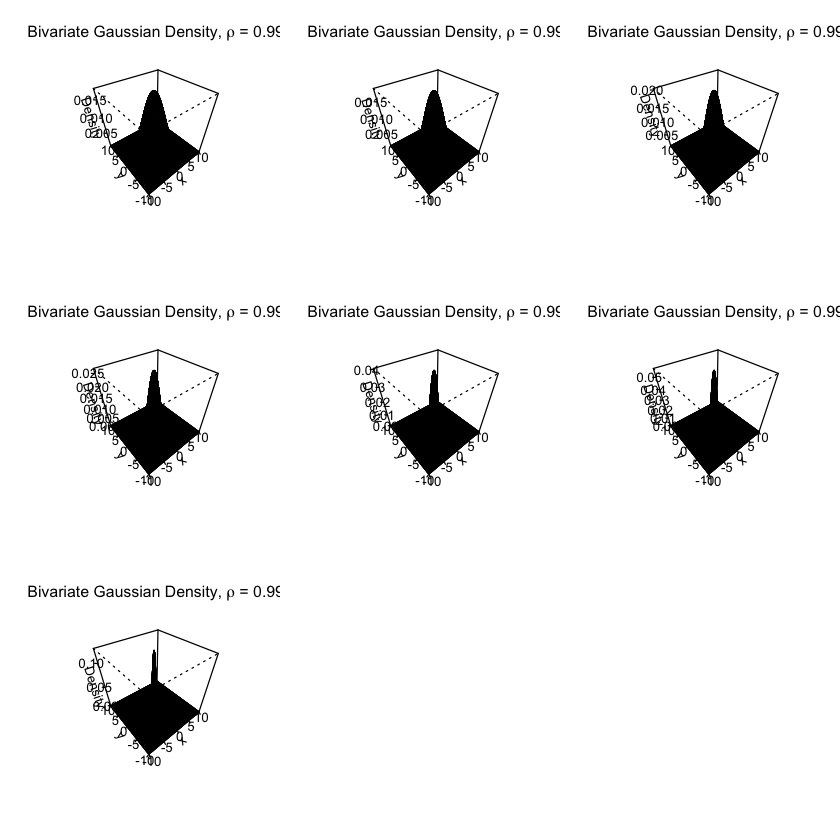

In [ ]:
# Slide 36

library(MASS)
density.3d<-kde2d(organ$weight,organ$organ)

persp(density.3d,theta=40,phi=40,xlab="Weight",ylab="Organ",zlab="Density",col="green",
      ticktype="detailed")

library(ggplot2)
library(ggExtra)
p <- ggplot(organ, aes(weight, organ)) + geom_point() + theme_classic()
ggExtra::ggMarginal(p, type = "histogram")


# Slide 39:

par(mfrow=c(3,3))
my.rho<-c(0,0.25,0.5,0.75,0.90,0.95,0.99)
x<-(-100:100)/10
y<-x
z<-matrix(nrow=length(x),ncol=length(y))
for(i in 1:7){
  Sigma<-matrix(c(9,9*my.rho[i],9*my.rho[i],9),nrow=2)
  for(j in 1:length(x)){
   for(k in 1:length(y)){
     z[j,k]<-dmvnorm(c(x[j],y[k]),sigma=Sigma)
     }
   }
# exchange title;
   persp(x,y,z,theta=-40,phi=40,xlab="x",ylab="y",zlab="Density",col="green",shade=.4,ltheta=0,
        ticktype="detailed",main=expression(paste("Bivariate Gaussian Density, ",rho," = ",0.99)))
 }

In [ ]:
# Slide 40:

for(i in 1:7){
  Sigma<-matrix(c(9,9*my.rho[i],9*my.rho[i],9),nrow=2)
  for(j in 1:length(x)){
   for(k in 1:length(y)){
     z[j,k]<-min(dmvnorm(c(x[j],y[k]),sigma=Sigma),0.01)
     }
   }
# exchange title;
   persp(x,y,z,theta=-40,phi=40,xlab="x",ylab="y",zlab="Density",col="green",shade=.4,ltheta=0,
        ticktype="detailed",main=expression(paste("Bivariate Gaussian Density, ",rho," = ",0.99)))
 }

ERROR: Error in eval(expr, envir, enclos): objekt 'my.rho' blev ikke fundet


In [ ]:
# slide 41:

var(organ)
cor(organ)

round(var(organ),digits=2)
round(cor(organ),digits=2)

,weight,organ
weight,5.6348177,0.6442386
organ,0.6442386,0.1745356


,weight,organ
weight,1.000000,0.649628
organ,0.649628,1.000000


,weight,organ
weight,5.63,0.64
organ,0.64,0.17


,weight,organ
weight,1.00,0.65
organ,0.65,1.00


In [ ]:
#slide 42:
my.corr<-cor(organ)[1,2]
my.T<-sqrt(147)*my.corr/sqrt(1-my.corr^2)
my.T

# p-value:
2*pt(-my.T,df=147)

[1] 10.36014

[1] 3.175071e-19

In [ ]:
# Slide 43:

cor.test(organ[,1],organ[,2])

# Slide 49:

X1<-c(1,3,1)
X2<-c(0,4,5)
X3<-c(2,5,9)
X<-cbind(X1,X2,X3)
Xbar<-(X1+X2+X3)/3

#Slide 50:
n<-3
my.S<-(X1%*%t(X1)+X2%*%t(X2)+X3%*%t(X3))/(n-1)-(n/(n-1))*Xbar%*%t(Xbar)-
      (X1-Xbar+X2-Xbar+X3-Xbar)/(n-1)
my.S
# faster:
var(t(X))

# NOTE: the covariance between X and Y is not the same as between Y and X, because Y is transposed
# In one dimension though, they are the same


	Pearson's product-moment correlation

data:  organ[, 1] and organ[, 2]
t = 10.36, df = 147, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5458474 0.7337775
sample estimates:
     cor 
0.649628 


1.0,0.5,2
0.5,1.0,4
2.0,4.0,16


1.0,0.5,2
0.5,1.0,4
2.0,4.0,16


In [ ]:
# Slide 53:

my.T<-diag(1/sqrt(diag(my.S)))
my.T

my.T%*%my.S%*%my.T

# faster:

cor(t(X))

1,0,0.00
0,1,0.00
0,0,0.25


1.0,0.5,0.5
0.5,1.0,1.0
0.5,1.0,1.0


1.0,0.5,0.5
0.5,1.0,1.0
0.5,1.0,1.0


,n,Mean,SD,Min,Max
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
weight,149,23.3758,2.3738,16.0,23.3758
organ,149,2.0215,0.4178,0.7,2.0215


,weight,organ
weight,5.6348177,0.6442386
organ,0.6442386,0.1745356


,weight,organ
weight,1.000000,0.649628
organ,0.649628,1.000000



	Pearson's product-moment correlation

data:  organ$weight and organ$organ
t = 10.36, df = 147, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5458474 0.7337775
sample estimates:
     cor 
0.649628 


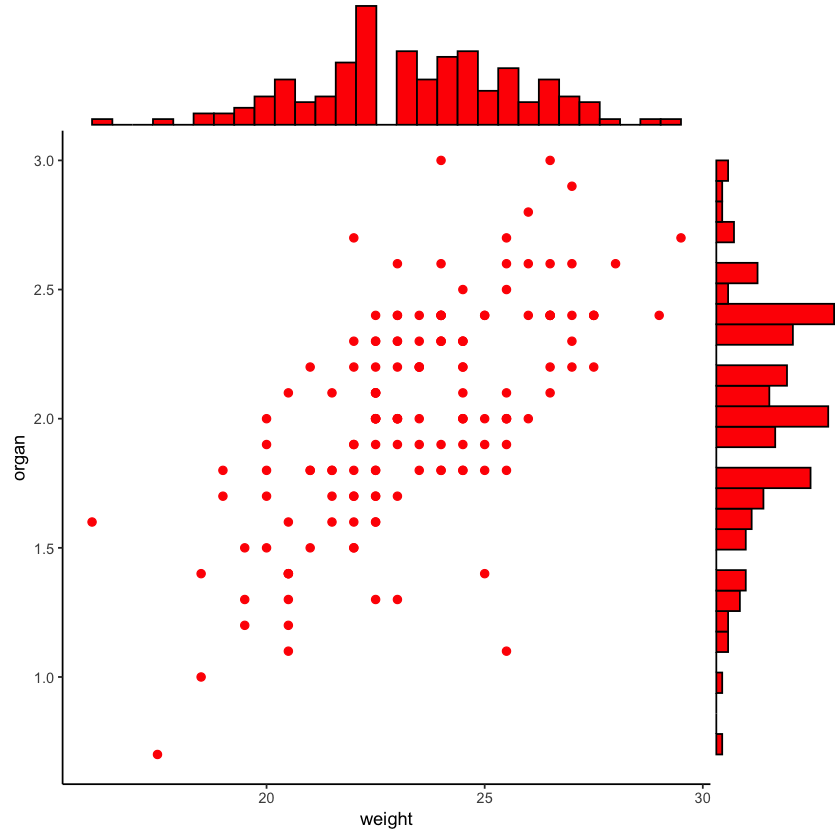

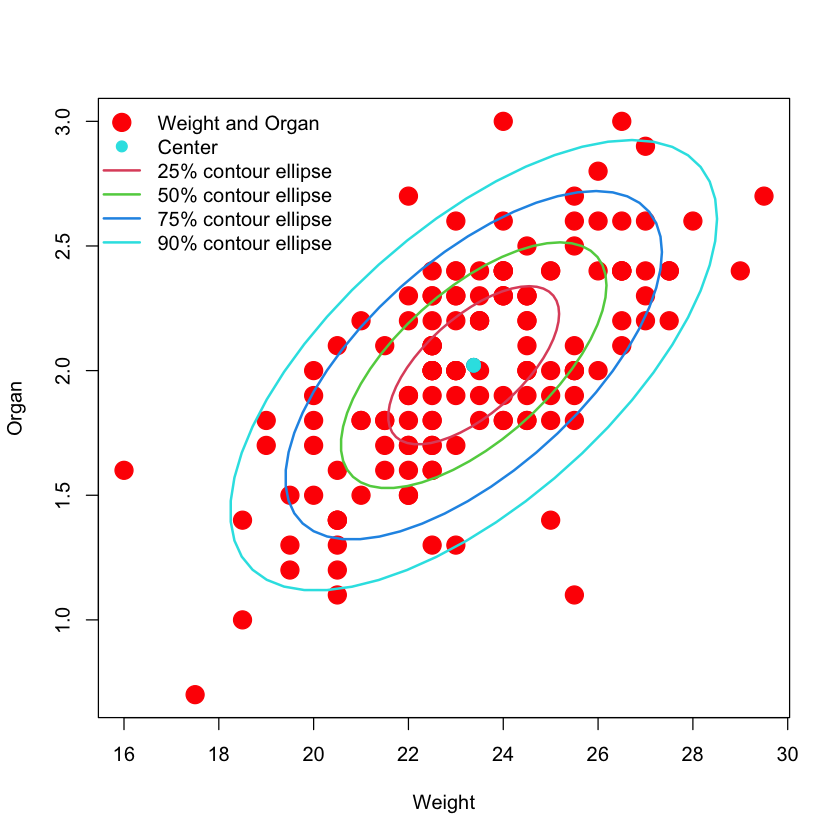

In [ ]:
# Slide 59:
p <- ggplot(organ, aes(weight, organ)) + geom_point(col="red",cex=2) + theme_classic()
ggExtra::ggMarginal(p, type = "histogram",fill="red")

# slide 61:
round(data.frame(n=sapply(organ,length),
           Mean=sapply(organ,mean),
           SD=sapply(organ,sd),
           Min=sapply(organ,min),
           Max=sapply(organ,mean)),digits=4)

cov(organ)

cor(organ)
cor.test(organ$weight,organ$organ)

with(organ,plot(weight,organ,pch=19,col="red",cex=2,xlab="Weight",ylab="Organ"))

library(car)
my.index<-c(0.25,0.50,0.75,0.9)
for(i in 1:4){
with(organ,dataEllipse(weight,organ,level=my.index[i],add=T,plot.points=F,col=i+1))
  }

legend("topleft", c("Weight and Organ","Center","25% contour ellipse",
                    "50% contour ellipse","75% contour ellipse","90% contour ellipse"),
       pch=c(19,19,rep(NA,4)),lty=c(NA,NA,rep(1,4)),col=c("red",5,2:5),
       pt.cex=c(2,1.2,rep(NA,4)),lwd=c(NA,NA,rep(2,4)),
       bty="n")

In [ ]:
# slide 63:

eigen(var(organ))$values

# Error:
# my.eigenvectors<--eigen(var(organ))$vectors
# my.center<-colMeans(organ)

# arrows(my.center[1],my.center[2],my.center[1]+eigen(var(organ))$values[1]*my.eigenvectors[1,1],
#        my.center[2]+eigen(var(organ))$values[1]*my.eigenvectors[2,1],col="black",lwd=2,
#        angle=10,length=0.15)
# arrows(my.center[1],my.center[2],my.center[1]+eigen(var(organ))$values[2]*my.eigenvectors[1,2],
#        my.center[2]+eigen(var(organ))$values[2]*my.eigenvectors[2,2],col="black",lwd=2,
#        angle=10,length=0.1)

# note that the eigenvectors do not appear perpendicular; it is because the axes
# are scaled different. 

[1] 5.70979939 0.09955396

Warning message:
"pakke 'plot3D' blev bygget under R version 4.3.3"


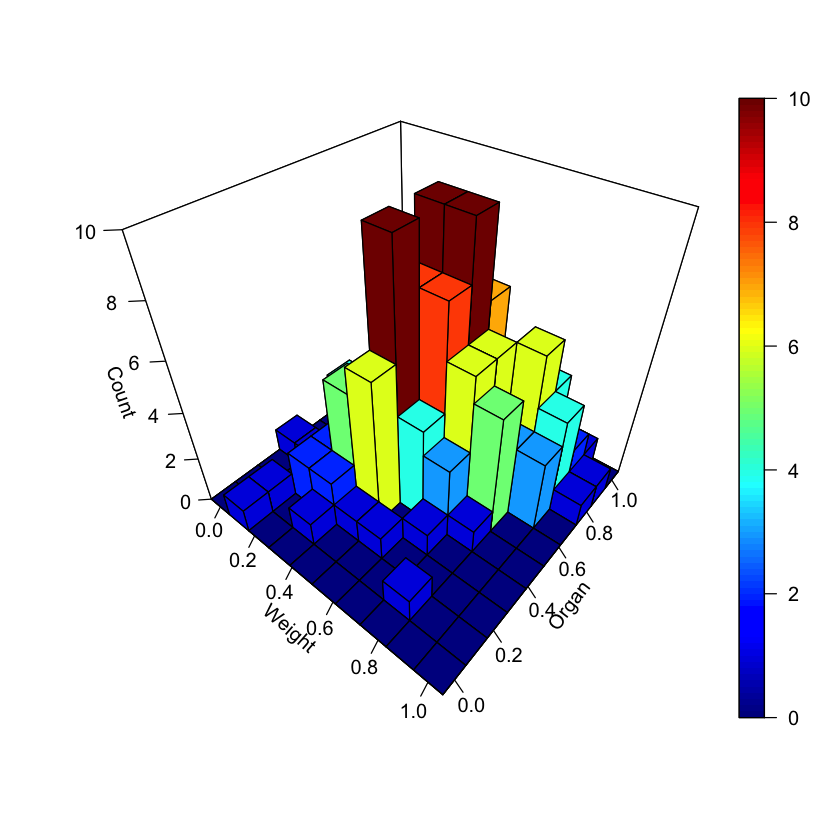

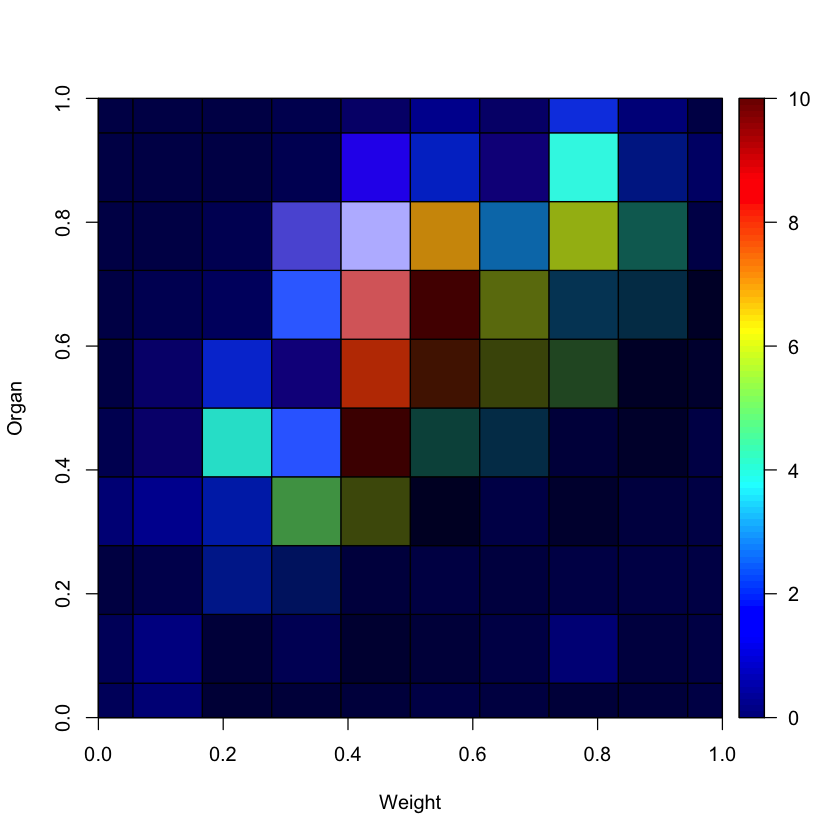

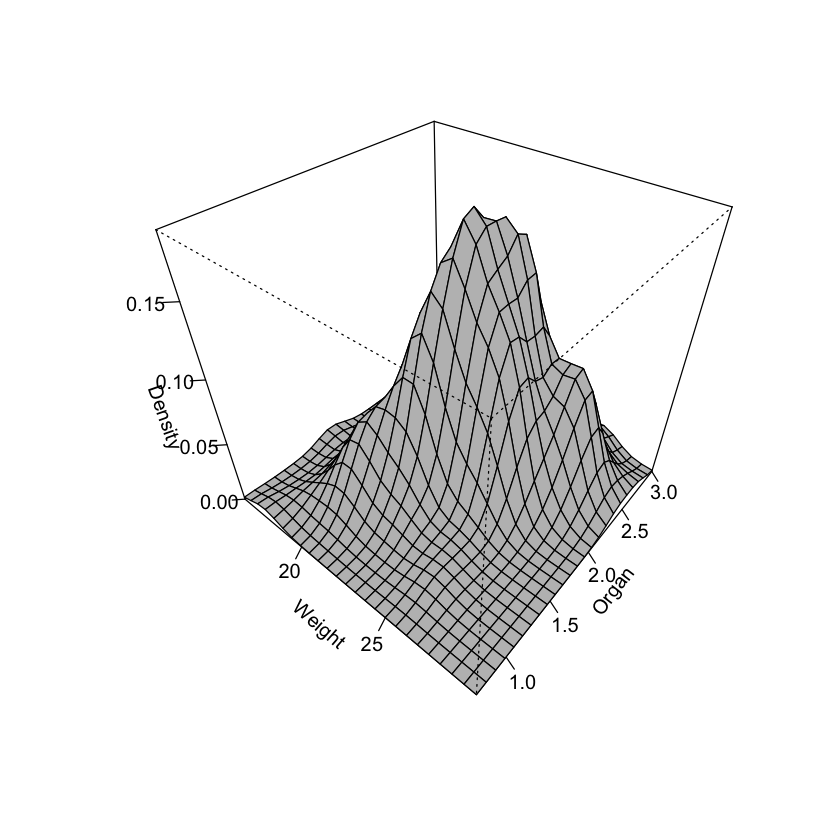

In [ ]:
# Slide 63
library(plot3D)
x_c <- cut(organ$weight,10)
y_c <- cut(organ$organ,10)
z <- table(x_c, y_c)

hist3D(z=z, border="black",xlab="Weight",ylab="Organ",zlab="Count",ticktype="detailed")
image2D(z=z,border="black",lighting=T,xlab="Weight",ylab="Organ")

density.3d<-kde2d(organ$weight,organ$organ)
persp(density.3d,theta=40,phi=40,xlab="Weight",ylab="Organ",zlab="Density",col="grey",
      ticktype="detailed")

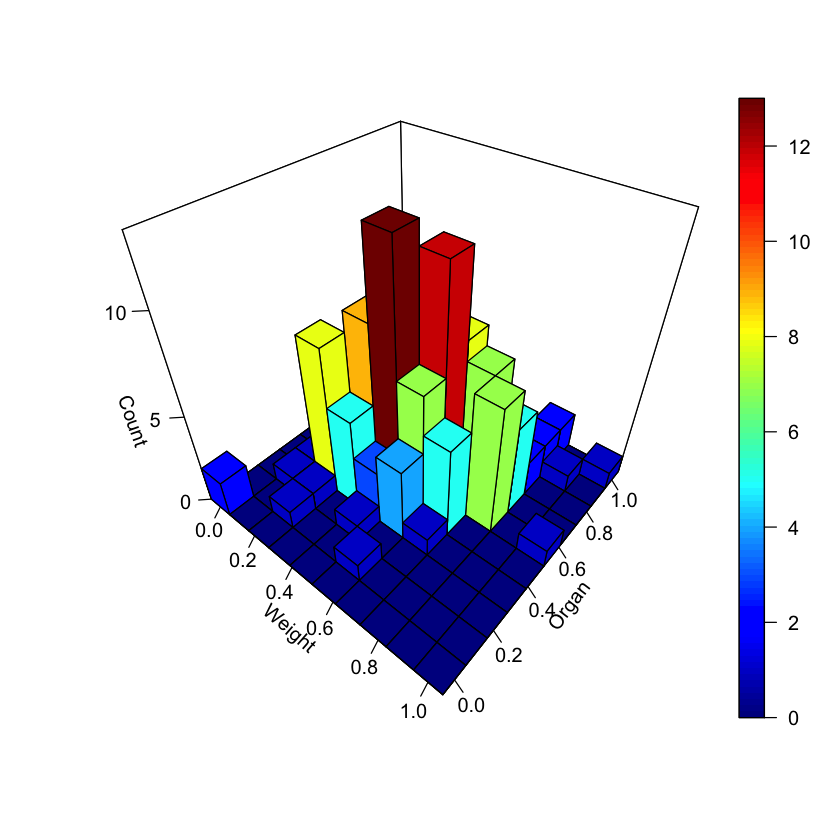

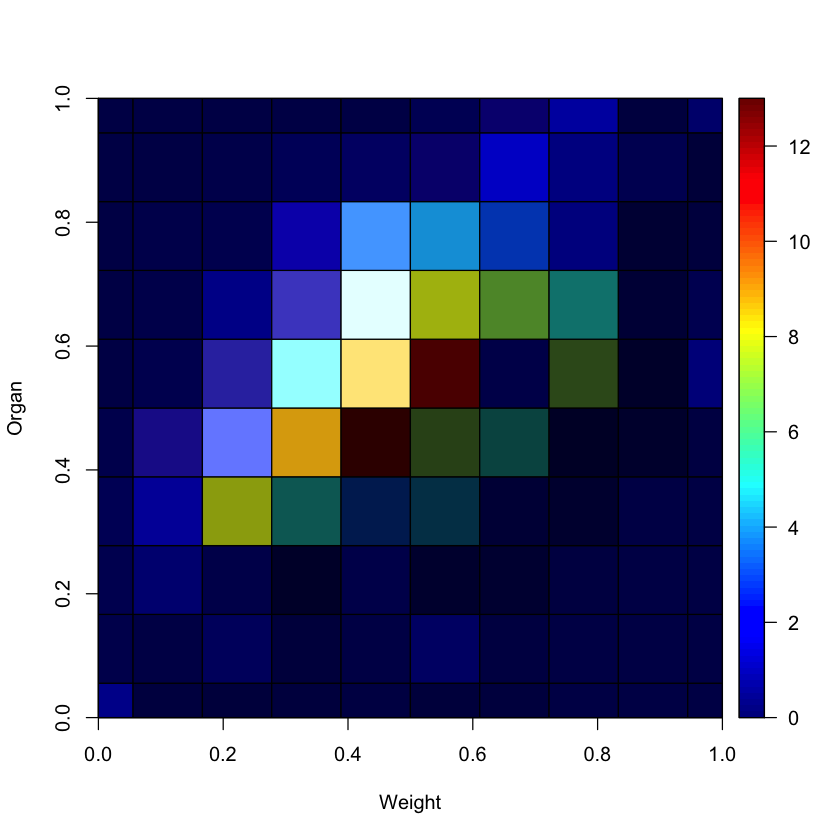

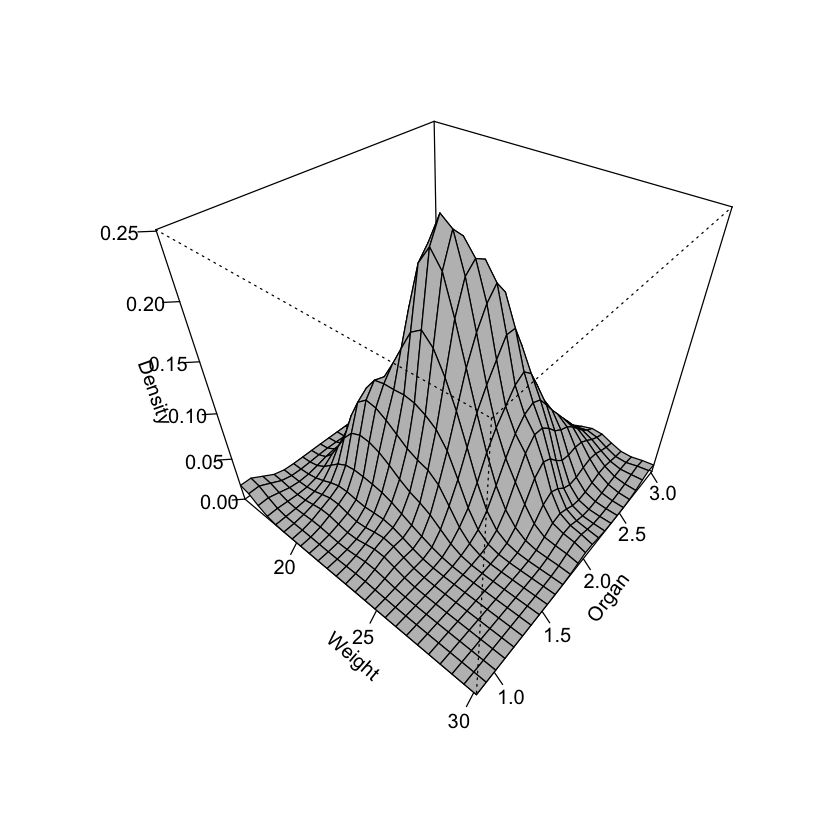

In [ ]:
# Slide 64:

mu.x<-mean(organ$weight)
mu.y<-mean(organ$organ)
Sigma<-cov(organ)
Sigmainv<-solve(Sigma)

set.seed(5904)
organ.sim<-as.data.frame(rmvnorm(149, mean = c(mu.x,mu.y), sigma = Sigma))
names(organ.sim)<-c("weight","organ")

x_c <- cut(organ.sim$weight,10)
y_c <- cut(organ.sim$organ,10)
z <- table(x_c, y_c)

hist3D(z=z, border="black",xlab="Weight",ylab="Organ",zlab="Count",ticktype="detailed")
image2D(z=z,border="black",lighting=T,xlab="Weight",ylab="Organ")

density.3d<-kde2d(organ.sim$weight,organ.sim$organ)
persp(density.3d,theta=40,phi=40,xlab="Weight",ylab="Organ",zlab="Density",col="grey",
      ticktype="detailed")

     Index       Height.Inches.  Weight.Pounds.  
 Min.   :    1   Min.   :60.28   Min.   : 78.01  
 1st Qu.: 6251   1st Qu.:66.70   1st Qu.:119.31  
 Median :12500   Median :68.00   Median :127.16  
 Mean   :12500   Mean   :67.99   Mean   :127.08  
 3rd Qu.:18750   3rd Qu.:69.27   3rd Qu.:134.89  
 Max.   :25000   Max.   :75.15   Max.   :170.92  

,Index,Height.Inches.,Weight.Pounds.
,<dbl>,<dbl>,<dbl>
1,1,65.78331,112.9925
2,2,71.51521,136.4873
3,3,69.39874,153.0269
4,4,68.21660,142.3354
5,5,67.78781,144.2971
6,6,68.69784,123.3024


,height,weight
,<dbl>,<dbl>
1,167.0896,51.25249
2,181.6486,61.90955
3,176.2728,69.41178
4,173.2702,64.56220
5,172.1810,65.45201
6,174.4925,55.92898


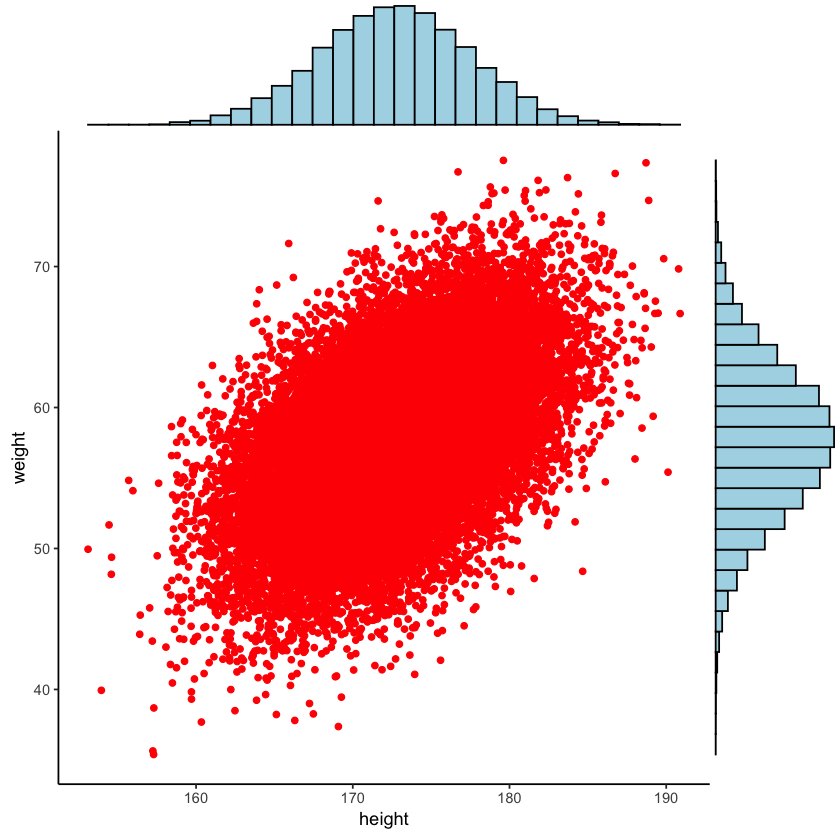

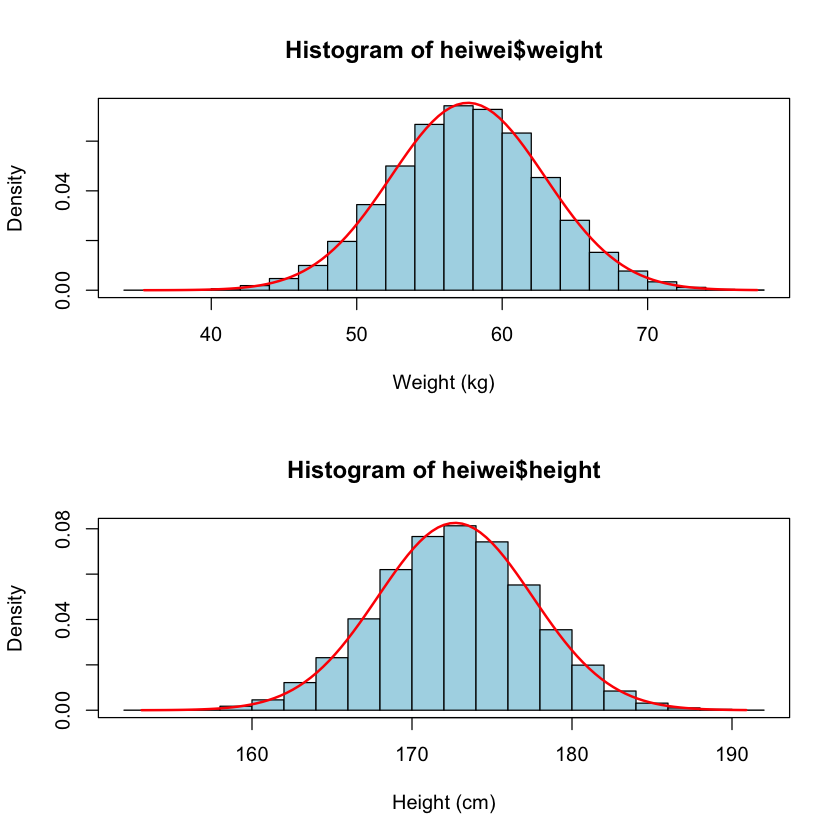

In [ ]:
# Slide 65

heiwei<-read.table("../data/heiwei.txt",header=T,sep="\t",dec=".")

summary(heiwei)
head(heiwei)

# converting to cm and kg:
heiwei[,2]<-2.54*heiwei[,2]
heiwei[,3]<-0.453592*heiwei[,3]
heiwei<-heiwei[,2:3]
names(heiwei)<-c("height","weight")
head(heiwei)


p <- ggplot(heiwei, aes(height,weight)) + geom_point(col="red") + theme_classic()
ggExtra::ggMarginal(p, type = "histogram",fill="lightblue")

par(mfrow=c(2,1))
hist(heiwei$weight,col="lightblue",probability=T,xlab="Weight (kg)")
with(heiwei,curve(dnorm(x,mean=mean(weight),sd=sd(weight)),min(weight),max(weight),
     lwd=2,col="red",add=T))
box()
hist(heiwei$height,col="lightblue",probability=T,xlab="Height (cm)")
with(heiwei,curve(dnorm(x,mean=mean(height),sd=sd(height)),min(height),max(height),
     lwd=2,col="red",add=T))
box()
par(mfrow=c(1,1))

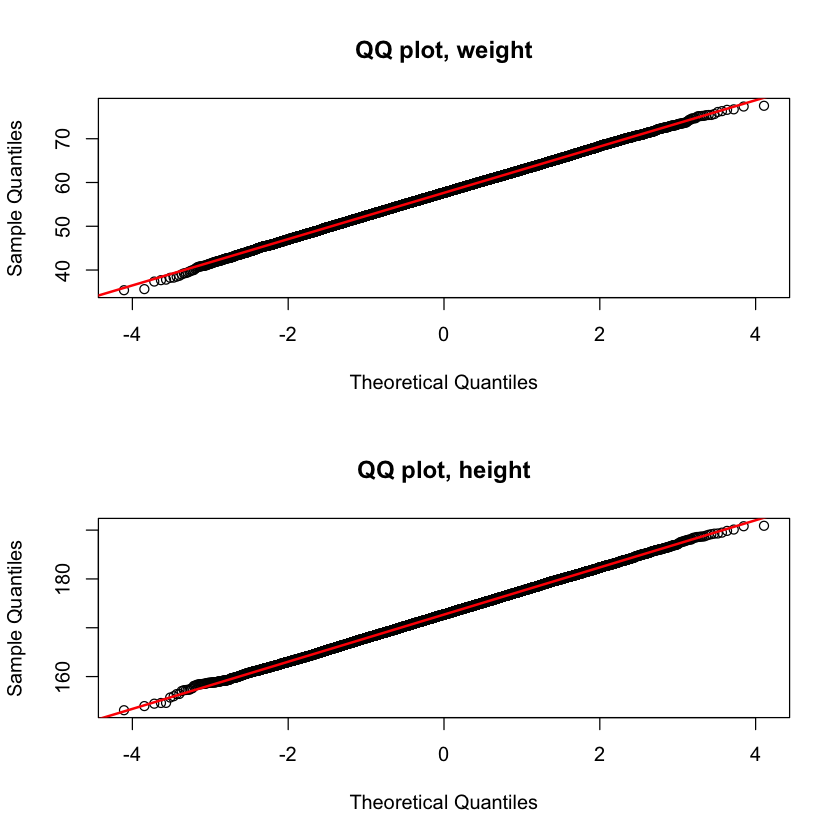

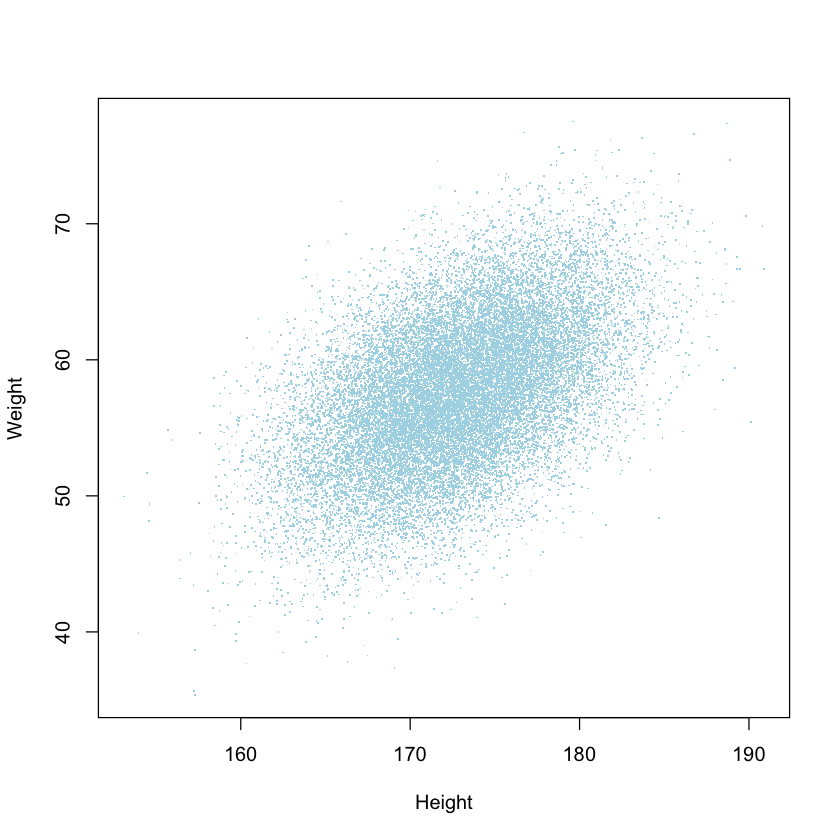

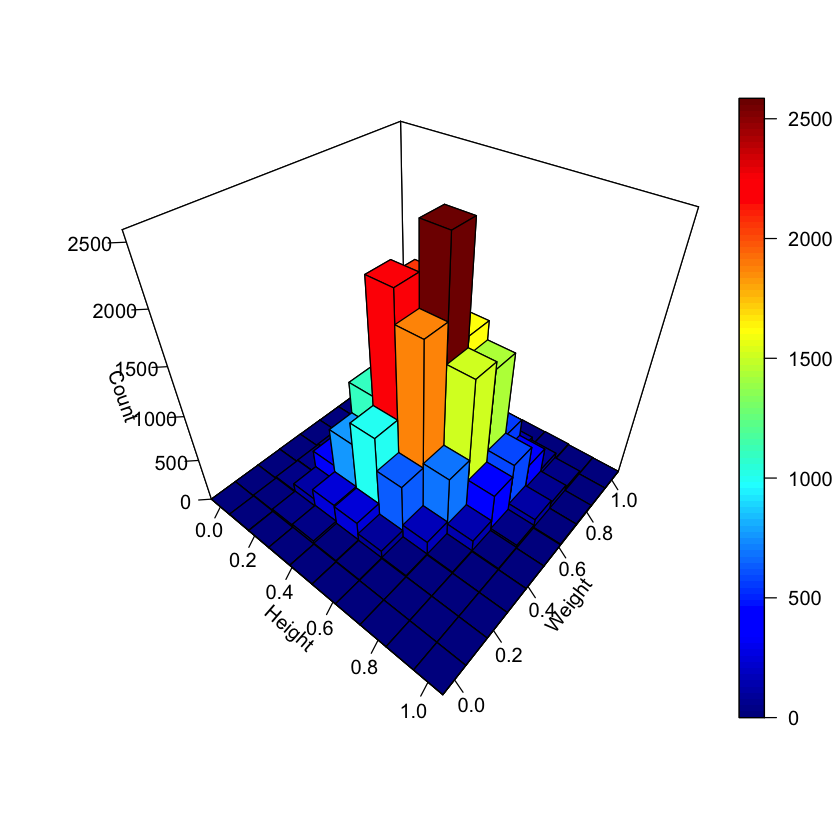

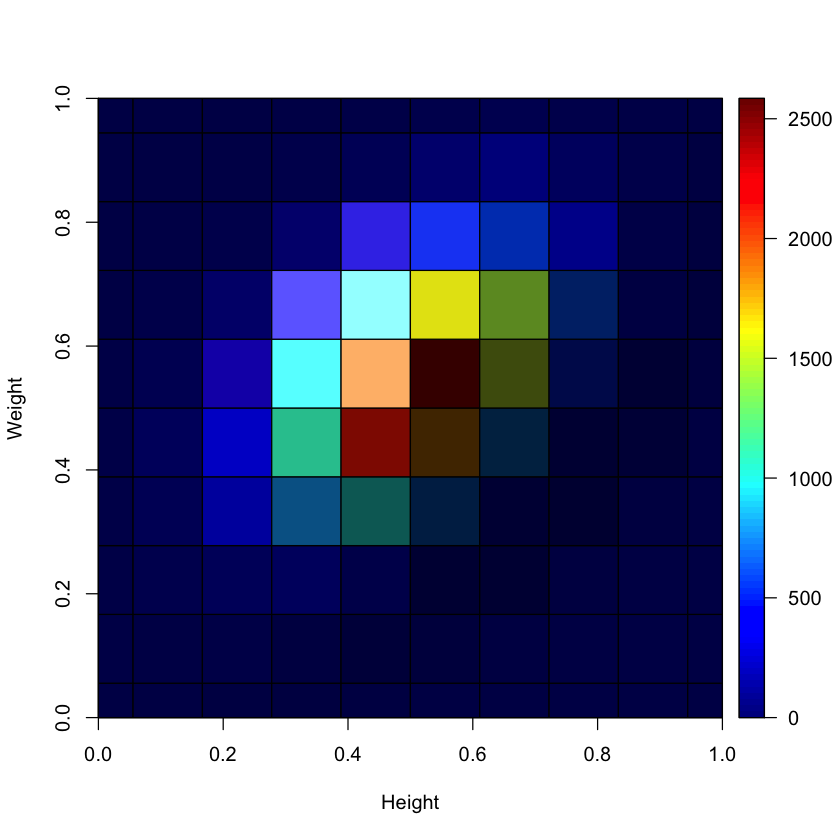

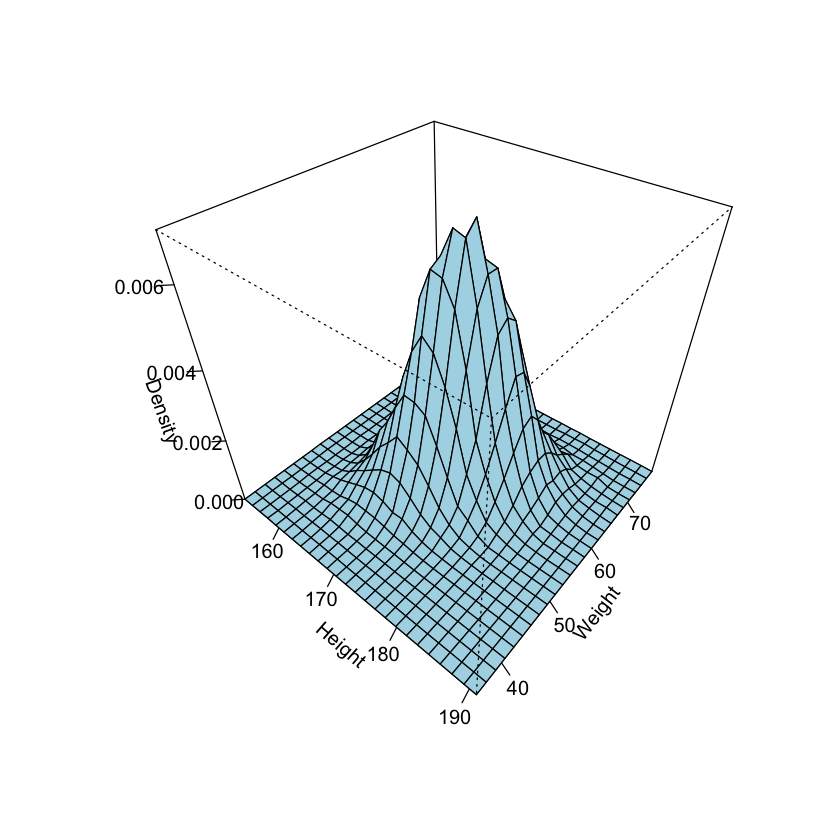

In [ ]:
# Slide 67:
par(mfrow=c(2,1))
qqnorm(heiwei$weight,main="QQ plot, weight")
lines((-5):5,mean(heiwei$weight)+sd(heiwei$weight)*((-5):5),type="l",lwd=2,col="red")
qqnorm(heiwei$height,main="QQ plot, height")
lines((-5):5,mean(heiwei$height)+sd(heiwei$height)*((-5):5),type="l",lwd=2,col="red")
par(mfrow=c(1,1))

# Slide 68:

plot(heiwei$height,heiwei$weight,xlab="Height",ylab="Weight",col="lightblue",pch=".")

x_c <- cut(heiwei$height,10)
y_c <- cut(heiwei$weight,10)
z <- table(x_c, y_c)

hist3D(z=z, border="black",xlab="Height",ylab="Weight",zlab="Count",ticktype="detailed")
image2D(z=z,border="black",lighting=T,xlab="Height",ylab="Weight")

density.3d<-kde2d(heiwei$height,heiwei$weight)
persp(density.3d,theta=40,phi=40,xlab="Height",ylab="Weight",zlab="Density",col="lightblue",
      ticktype="detailed")

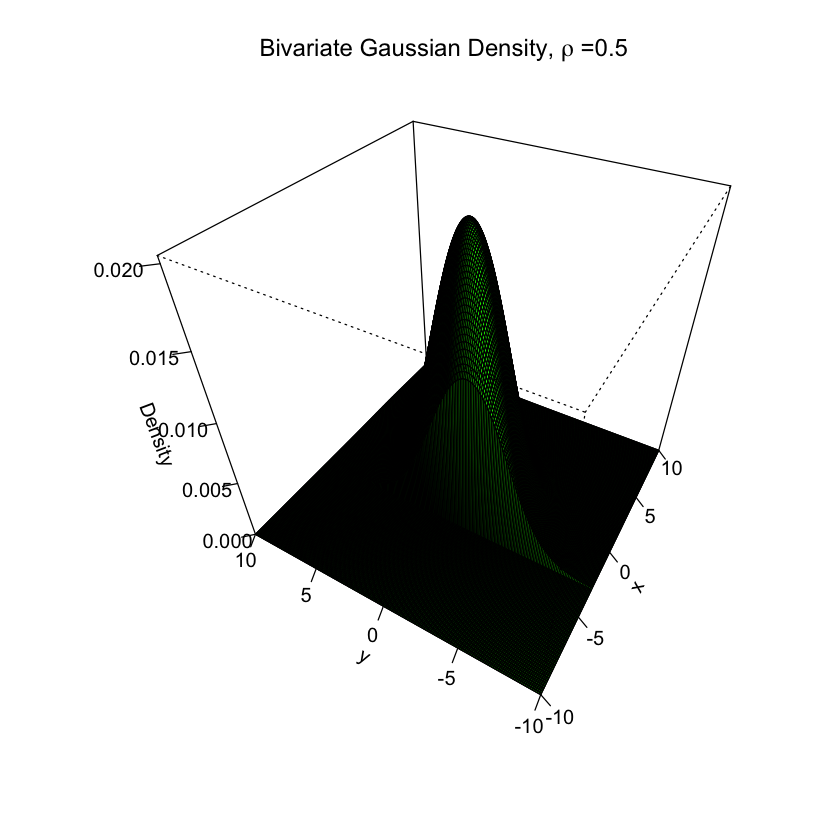

In [ ]:
#Slide 69:

my.rho<-0.5
x<-(-100:100)/10
y<-x
z<-matrix(nrow=length(x),ncol=length(y))
  Sigma<-matrix(c(9,9*my.rho,9*my.rho,9),nrow=2)
  for(j in 1:length(x)){
   for(k in 1:length(y)){
     z[j,k]<-dmvnorm(c(x[j],y[k]),sigma=Sigma)*(x[j]>-3)
     }
   }
   persp(x,y,z,theta=-60,phi=40,xlab="x",ylab="y",zlab="Density",col="green",shade=.4,ltheta=0,
        ticktype="detailed",main=expression(paste("Bivariate Gaussian Density, ",rho," =0.5")))

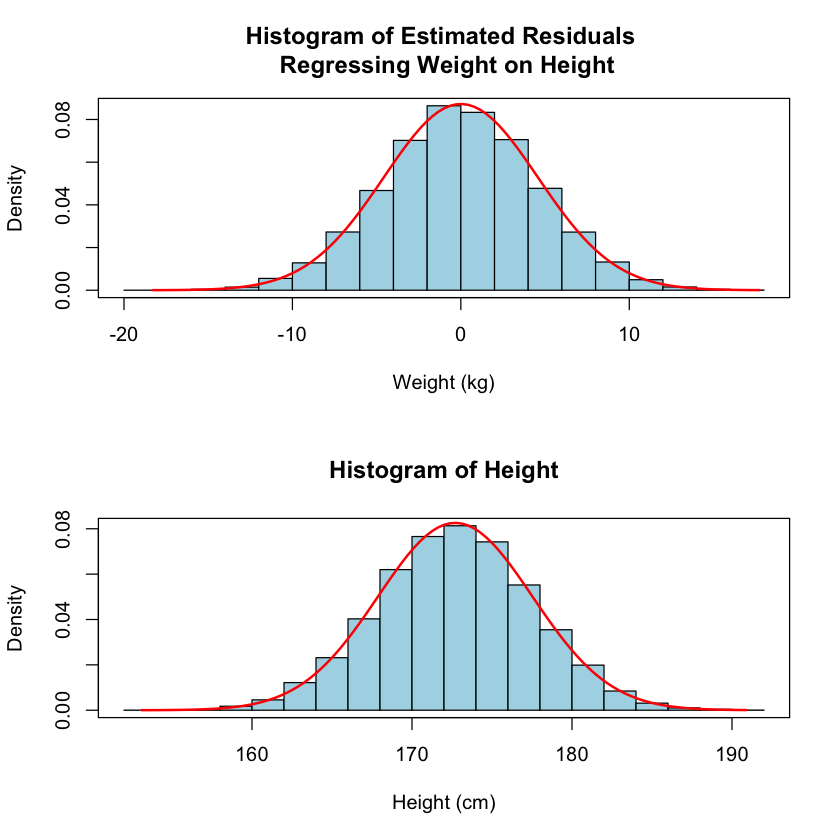

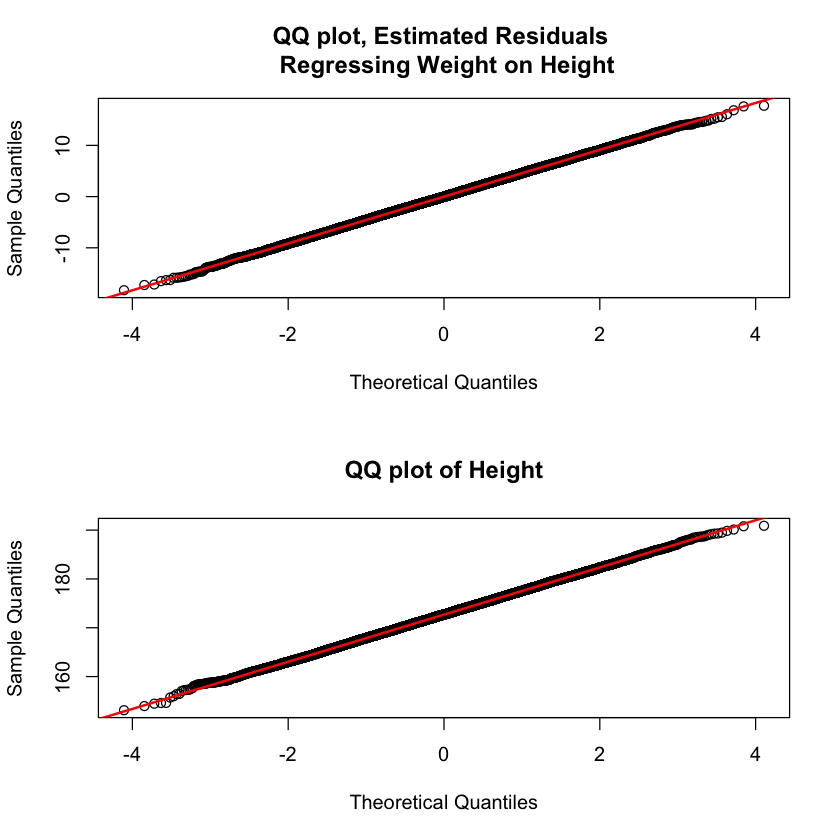

In [ ]:
# Slide 73:

analysis<-lm(weight~height,data=heiwei)

par(mfrow=c(2,1))
hist(analysis$res,col="lightblue",probability=T,xlab="Weight (kg)",
main="Histogram of Estimated Residuals \n Regressing Weight on Height" )
curve(dnorm(x,mean=mean(analysis$res),sd=sd(analysis$res)),min(analysis$res),max(analysis$res),
     lwd=2,col="red",add=T)
box()
hist(heiwei$height,col="lightblue",probability=T,xlab="Height (cm)",main="Histogram of Height")
with(heiwei,curve(dnorm(x,mean=mean(height),sd=sd(height)),min(height),max(height),
     lwd=2,col="red",add=T))
box()
par(mfrow=c(1,1))


par(mfrow=c(2,1))
qqnorm(analysis$res,main="QQ plot, Estimated Residuals \n Regressing Weight on Height")
lines((-5):5,sd(analysis$res)*((-5):5),type="l",lwd=2,col="red")
qqnorm(heiwei$height,main="QQ plot of Height")
lines((-5):5,mean(heiwei$height)+sd(heiwei$height)*((-5):5),type="l",lwd=2,col="red")
par(mfrow=c(1,1))